FLIGHT DELAY PREDICTION - NDIBE IFEOMA

In [1]:
import pandas as pd #Data preprocessing
import numpy as np
import matplotlib.pyplot as plt #Data Visualization
import seaborn as sns #Data Visualization
import missingno as msno #Missing data - Data Visualization
from collections import Counter #Counting
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\hp\Desktop\10ALYTICS\MACHINE LEARNING\flights.csv")
airp=pd.read_csv(r"C:\Users\hp\Desktop\10ALYTICS\MACHINE LEARNING\airports.csv")
airl=pd.read_csv(r"C:\Users\hp\Desktop\10ALYTICS\MACHINE LEARNING\airlines.csv")

In [3]:
df.columns


Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [4]:
airp.columns

Index(['IATA_CODE', 'AIRPORT', 'CITY', 'STATE', 'COUNTRY', 'LATITUDE',
       'LONGITUDE'],
      dtype='object')

In [5]:
airl.columns

Index(['IATA_CODE', 'AIRLINE'], dtype='object')

In [6]:
df.head(3)

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   
1  2015      1    1            4      AA           2336      N3KUAA   
2  2015      1    1            4      US            840      N171US   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  ARRIVAL_TIME  \
0            ANC                 SEA                    5  ...         408.0   
1            LAX                 PBI                   10  ...         741.0   
2            SFO                 CLT                   20  ...         811.0   

   ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  AIR_SYSTEM_DELAY  \
0          -22.0         0          0                  NaN               NaN   
1           -9.0         0          0                  NaN               NaN   
2            5.0         0          0                  NaN               NaN   

   SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
0             NaN            NaN                  NaN            NaN  
1             NaN            NaN                  NaN            NaN  
2             NaN            NaN                  NaN            NaN  

[3 rows x 31 columns]

In [7]:
# Merging on AIRLINE and IATA_CODE
# An "inner" merge will only keep rows where there is a match in both dataframes. 
# The merged dataframe is then stored back into df.
df = df.merge(airl, left_on='AIRLINE', right_on='IATA_CODE', how='inner')
df = df.drop(['AIRLINE_x','IATA_CODE'], axis=1)
df = df.rename(columns={"AIRLINE_y":"AIRLINE"})
df

YEAR  MONTH  DAY  DAY_OF_WEEK  FLIGHT_NUMBER TAIL_NUMBER  \
0        2015      1    1            4             98      N407AS   
1        2015      1    1            4            135      N527AS   
2        2015      1    1            4            108      N309AS   
3        2015      1    1            4            122      N413AS   
4        2015      1    1            4            130      N457AS   
...       ...    ...  ...          ...            ...         ...   
1048570  2015      3   10            2            953      N529VA   
1048571  2015      3   10            2            251      N853VA   
1048572  2015      3   10            2             69      N626VA   
1048573  2015      3   10            2            956      N623VA   
1048574  2015      3   10            2            334      N841VA   

        ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  \
0                  ANC                 SEA                    5   
1                  SEA                 ANC                   25   
2                  ANC                 SEA                   45   
3                  ANC                 PDX                   50   
4                  FAI                 SEA                  115   
...                ...                 ...                  ...   
1048570            SAN                 SFO                  925   
1048571            JFK                 LAS                  945   
1048572            IAD                 SFO                 1000   
1048573            SFO                 SAN                 1000   
1048574            LAX                 FLL                 1010   

         DEPARTURE_TIME  ...  ARRIVAL_DELAY  DIVERTED  CANCELLED  \
0                2354.0  ...          -22.0         0          0   
1                  24.0  ...          -21.0         0          0   
2                  41.0  ...          -14.0         0          0   
3                  46.0  ...          -18.0         0          0   
4                 107.0  ...           -3.0         0          0   
...                 ...  ...            ...       ...        ...   
1048570          1044.0  ...           74.0         0          0   
1048571           940.0  ...           -2.0         0          0   
1048572           957.0  ...          -25.0         0          0   
1048573           953.0  ...          -15.0         0          0   
1048574          1004.0  ...            1.0         0          0   

         CANCELLATION_REASON  AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  \
0                        NaN               NaN             NaN            NaN   
1                        NaN               NaN             NaN            NaN   
2                        NaN               NaN             NaN            NaN   
3                        NaN               NaN             NaN            NaN   
4                        NaN               NaN             NaN            NaN   
...                      ...               ...             ...            ...   
1048570                  NaN              74.0             0.0            0.0   
1048571                  NaN               NaN             NaN            NaN   
1048572                  NaN               NaN             NaN            NaN   
1048573                  NaN               NaN             NaN            NaN   
1048574                  NaN               NaN             NaN            NaN   

         LATE_AIRCRAFT_DELAY  WEATHER_DELAY               AIRLINE  
0                        NaN            NaN  Alaska Airlines Inc.  
1                        NaN            NaN  Alaska Airlines Inc.  
2                        NaN            NaN  Alaska Airlines Inc.  
3                        NaN            NaN  Alaska Airlines Inc.  
4                        NaN            NaN  Alaska Airlines Inc.  
...                      ...            ...                   ...  
1048570                  0.0            0.0        Virgin America  
1048571                  NaN            N

In [8]:
df = df.merge(airp, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='inner')
df.head(3)

YEAR  MONTH  DAY  DAY_OF_WEEK  FLIGHT_NUMBER TAIL_NUMBER ORIGIN_AIRPORT  \
0  2015      1    1            4             98      N407AS            ANC   
1  2015      1    1            4            108      N309AS            ANC   
2  2015      1    1            4            122      N413AS            ANC   

  DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_TIME  ...  \
0                 SEA                    5          2354.0  ...   
1                 SEA                   45            41.0  ...   
2                 PDX                   50            46.0  ...   

   LATE_AIRCRAFT_DELAY  WEATHER_DELAY               AIRLINE  IATA_CODE  \
0                  NaN            NaN  Alaska Airlines Inc.        ANC   
1                  NaN            NaN  Alaska Airlines Inc.        ANC   
2                  NaN            NaN  Alaska Airlines Inc.        ANC   

                                       AIRPORT       CITY  STATE  COUNTRY  \
0  Ted Stevens Anchorage International Airport  Anchorage     AK      USA   
1  Ted Stevens Anchorage International Airport  Anchorage     AK      USA   
2  Ted Stevens Anchorage International Airport  Anchorage     AK      USA   

   LATITUDE  LONGITUDE  
0  61.17432 -149.99619  
1  61.17432 -149.99619  
2  61.17432 -149.99619  

[3 rows x 38 columns]

In [9]:
df.tail(3)

YEAR  MONTH  DAY  DAY_OF_WEEK  FLIGHT_NUMBER TAIL_NUMBER  \
1048572  2015      3   10            2           4199      N454WN   
1048573  2015      3   10            2           3220      N8653A   
1048574  2015      3   10            2           3042      N8610A   

        ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  \
1048572            ISP                 TPA                  635   
1048573            ISP                 PBI                  640   
1048574            ISP                 MCO                  705   

         DEPARTURE_TIME  ...  LATE_AIRCRAFT_DELAY  WEATHER_DELAY  \
1048572           632.0  ...                  NaN            NaN   
1048573           640.0  ...                  NaN            NaN   
1048574           704.0  ...                  NaN            NaN   

                        AIRLINE  IATA_CODE                        AIRPORT  \
1048572  Southwest Airlines Co.        ISP  Long Island MacArthur Airport   
1048573  Southwest Airlines Co.        ISP  Long Island MacArthur Airport   
1048574  Southwest Airlines Co.        ISP  Long Island MacArthur Airport   

          CITY  STATE  COUNTRY  LATITUDE  LONGITUDE  
1048572  Islip     NY      USA  40.79524  -73.10021  
1048573  Islip     NY      USA  40.79524  -73.10021  
1048574  Islip     NY      USA  40.79524  -73.10021  

[3 rows x 38 columns]

In [10]:
#Dimensionality of the data -The number of rows and columns
df.shape

(1048575, 38)

In [11]:
# Investigate the dataset for anomalies and data types. This will help in creating a variety of data visualizations
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 38 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   YEAR                 1048575 non-null  int64  
 1   MONTH                1048575 non-null  int64  
 2   DAY                  1048575 non-null  int64  
 3   DAY_OF_WEEK          1048575 non-null  int64  
 4   FLIGHT_NUMBER        1048575 non-null  int64  
 5   TAIL_NUMBER          1040825 non-null  object 
 6   ORIGIN_AIRPORT       1048575 non-null  object 
 7   DESTINATION_AIRPORT  1048575 non-null  object 
 8   SCHEDULED_DEPARTURE  1048575 non-null  int64  
 9   DEPARTURE_TIME       1009060 non-null  float64
 10  DEPARTURE_DELAY      1009060 non-null  float64
 11  TAXI_OUT             1008346 non-null  float64
 12  WHEELS_OFF           1008346 non-null  float64
 13  SCHEDULED_TIME       1048573 non-null  float64
 14  ELAPSED_TIME         1005504 non-null  float64
 15

In [12]:
# there are lots of missing data. which is vital to the dataset.
df.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
FLIGHT_NUMBER                0
TAIL_NUMBER               7750
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           39515
DEPARTURE_DELAY          39515
TAXI_OUT                 40229
WHEELS_OFF               40229
SCHEDULED_TIME               2
ELAPSED_TIME             43071
AIR_TIME                 43071
DISTANCE                     0
WHEELS_ON                41296
TAXI_IN                  41296
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             41296
ARRIVAL_DELAY            43071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    1008048
AIR_SYSTEM_DELAY        820047
SECURITY_DELAY          820047
AIRLINE_DELAY           820047
LATE_AIRCRAFT_DELAY     820047
WEATHER_DELAY           820047
AIRLINE                      0
IATA_CODE                    0
AIRPORT 

DATA CLEANING

In [13]:
missing_df = df.isnull().sum(axis=0).reset_index() # Calculate the number of NaN values in each column
missing_df.columns = ['variable', 'missing values'] # Rename the columns of the resulting DataFrame
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100 # Calculate the percentage of missing values in each column
missing_df.sort_values('filling factor (%)').reset_index(drop = True) # Sort the resulting DataFrame by the percentage of missing values in descending order

variable  missing values  filling factor (%)
0   CANCELLATION_REASON         1008048            3.864960
1         WEATHER_DELAY          820047           21.794149
2   LATE_AIRCRAFT_DELAY          820047           21.794149
3         AIRLINE_DELAY          820047           21.794149
4        SECURITY_DELAY          820047           21.794149
5      AIR_SYSTEM_DELAY          820047           21.794149
6         ARRIVAL_DELAY           43071           95.892425
7              AIR_TIME           43071           95.892425
8          ELAPSED_TIME           43071           95.892425
9          ARRIVAL_TIME           41296           96.061703
10              TAXI_IN           41296           96.061703
11            WHEELS_ON           41296           96.061703
12             TAXI_OUT           40229           96.163460
13           WHEELS_OFF           40229           96.163460
14       DEPARTURE_TIME           39515           96.231552
15      DEPARTURE_DELAY           39515           96.231552
16          TAIL_NUMBER            7750           99.260902
17             LATITUDE             649           99.938106
18            LONGITUDE             649           99.938106
19       SCHEDULED_TIME               2           99.999809
20    SCHEDULED_ARRIVAL               0          100.000000
21              COUNTRY               0          100.000000
22                STATE               0          100.000000
23                 CITY               0          100.000000
24              AIRPORT               0          100.000000
25            IATA_CODE               0          100.000000
26              AIRLINE               0          100.000000
27                MONTH               0          100.000000
28                  DAY               0          100.000000
29          DAY_OF_WEEK               0          100.000000
30        FLIGHT_NUMBER               0          100.000000
31       ORIGIN_AIRPORT               0          100.000000
32  DESTINATION_AIRPORT               0          100.000000
33            CANCELLED               0          100.000000
34             DIVERTED               0          100.000000
35  SCHEDULED_DEPARTURE               0          100.000000
36             DISTANCE               0          100.000000
37                 YEAR               0          100.000000

This shows we can work without the data that the filling factor is 95% but those that are less than 25% are replaced with the mode and median. If I use mean, it will be affected by outliers. Categorical data= mode, numerical =median

In [14]:
# filling in of missing inputs by filling it up with the mean values
# ideally check the distribution of the data to check for outliers and determine the best method of filling the missing value
df['CANCELLATION_REASON'] = df['CANCELLATION_REASON'].fillna(df['CANCELLATION_REASON'].mode())
df["LATE_AIRCRAFT_DELAY"] = df["LATE_AIRCRAFT_DELAY"].fillna(df["LATE_AIRCRAFT_DELAY"].median())
df["AIRLINE_DELAY"] = df["AIRLINE_DELAY"].fillna(df["AIRLINE_DELAY"].median())
df["SECURITY_DELAY"] = df["SECURITY_DELAY"].fillna(df["SECURITY_DELAY"].median())
df["AIR_SYSTEM_DELAY"] = df["AIR_SYSTEM_DELAY"].fillna(df["AIR_SYSTEM_DELAY"].median())
df["WEATHER_DELAY"] = df["WEATHER_DELAY"].fillna(df["WEATHER_DELAY"].median())


In [15]:
df.isnull().sum() # verify if there are still missing values.


YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
FLIGHT_NUMBER                0
TAIL_NUMBER               7750
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           39515
DEPARTURE_DELAY          39515
TAXI_OUT                 40229
WHEELS_OFF               40229
SCHEDULED_TIME               2
ELAPSED_TIME             43071
AIR_TIME                 43071
DISTANCE                     0
WHEELS_ON                41296
TAXI_IN                  41296
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             41296
ARRIVAL_DELAY            43071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    1008047
AIR_SYSTEM_DELAY             0
SECURITY_DELAY               0
AIRLINE_DELAY                0
LATE_AIRCRAFT_DELAY          0
WEATHER_DELAY                0
AIRLINE                      0
IATA_CODE                    0
AIRPORT 

In [16]:
# Create a boolean mask for missing values in the 'CANCELLATION_REASON' column
mask = df['CANCELLATION_REASON'].isna()

# Invert the mask to select only the rows with non-missing values
df_non_missing = df[~mask]

# Show the 'CANCELLATION_REASON' column of the filtered dataframe
print(df_non_missing['CANCELLATION_REASON'])

0          B
3          A
233        B
349        A
400        B
          ..
1048511    B
1048514    B
1048517    B
1048560    A
1048569    A
Name: CANCELLATION_REASON, Length: 40528, dtype: object


In [17]:
#Numerical Statistical Analysis
df.describe()

YEAR         MONTH           DAY   DAY_OF_WEEK  FLIGHT_NUMBER  \
count  1048575.0  1.048575e+06  1.048575e+06  1.048575e+06   1.048575e+06   
mean      2015.0  1.694297e+00  1.382097e+01  3.953196e+00   2.256759e+03   
std          0.0  7.051508e-01  8.725656e+00  1.999436e+00   1.799166e+03   
min       2015.0  1.000000e+00  1.000000e+00  1.000000e+00   1.000000e+00   
25%       2015.0  1.000000e+00  6.000000e+00  2.000000e+00   7.550000e+02   
50%       2015.0  2.000000e+00  1.300000e+01  4.000000e+00   1.725000e+03   
75%       2015.0  2.000000e+00  2.100000e+01  6.000000e+00   3.485000e+03   
max       2015.0  3.000000e+00  3.100000e+01  7.000000e+00   9.794000e+03   

       SCHEDULED_DEPARTURE  DEPARTURE_TIME  DEPARTURE_DELAY      TAXI_OUT  \
count         1.048575e+06    1.009060e+06     1.009060e+06  1.008346e+06   
mean          1.322632e+03    1.333705e+03     1.133485e+01  1.665380e+01   
std           4.707748e+02    4.827415e+02     3.922372e+01  1.007006e+01   
min           1.000000e+00    1.000000e+00    -6.100000e+01  1.000000e+00   
25%           9.200000e+02    9.280000e+02    -5.000000e+00  1.100000e+01   
50%           1.319000e+03    1.329000e+03    -1.000000e+00  1.400000e+01   
75%           1.720000e+03    1.731000e+03     1.100000e+01  1.900000e+01   
max           2.359000e+03    2.400000e+03     1.988000e+03  2.250000e+02   

         WHEELS_OFF  ...  ARRIVAL_DELAY      DIVERTED     CANCELLED  \
count  1.008346e+06  ...   1.005504e+06  1.048575e+06  1.048575e+06   
mean   1.357382e+03  ...   7.612191e+00  2.426150e-03  3.864960e-02   
std    4.830351e+02  ...   4.209367e+01  4.919620e-02  1.927585e-01   
min    1.000000e+00  ...  -8.200000e+01  0.000000e+00  0.000000e+00   
25%    9.440000e+02  ...  -1.200000e+01  0.000000e+00  0.000000e+00   
50%    1.342000e+03  ...  -3.000000e+00  0.000000e+00  0.000000e+00   
75%    1.745000e+03  ...   1.200000e+01  0.000000e+00  0.000000e+00   
max    2.400000e+03  ...   1.971000e+03  1.000000e+00  1.000000e+00   

       AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
count      1.048575e+06    1.048575e+06   1.048575e+06         1.048575e+06   
mean       6.112410e+00    1.249410e-02   5.531432e+00         8.123771e+00   
std        1.257001e+01    8.311498e-01   2.263660e+01         2.105781e+01   
min        0.000000e+00    0.000000e+00   0.000000e+00         0.000000e+00   
25%        4.000000e+00    0.000000e+00   2.000000e+00         4.000000e+00   
50%        4.000000e+00    0.000000e+00   2.000000e+00         4.000000e+00   
75%        4.000000e+00    0.000000e+00   2.000000e+00         4.000000e+00   
max        8.300000e+02    2.410000e+02   1.971000e+03         1.313000e+03   

       WEATHER_DELAY      LATITUDE     LONGITUDE  
count   1.048575e+06  1.047926e+06  1.047926e+06  
mean    7.726629e-01  3.642673e+01 -9.533915e+01  
std     1.111960e+01  5.976265e+00  1.805411e+01  
min     0.000000e+00  1.348345e+01 -1.766460e+02  
25%     0.000000e+00  3.289595e+01 -1.119778e+02  
50%     0.000000e+00  3.612448e+01 -9.025803e+01  
75%     0.000000e+00  4.077724e+01 -8.131603e+01  
max     1.152000e+03  7.128545e+01 -6.479856e+01  

[8 rows x 28 columns]

In [18]:
#Categorical Statistical Analysis
df.describe(include=["object", "bool"])

TAIL_NUMBER ORIGIN_AIRPORT DESTINATION_AIRPORT CANCELLATION_REASON  \
count      1040825        1048575             1048575               40528   
unique        4522            315                 315                   4   
top         N477HA            ATL                 ATL                   B   
freq           809          66599               66741               28261   

                       AIRLINE IATA_CODE  \
count                  1048575   1048575   
unique                      14       315   
top     Southwest Airlines Co.       ATL   
freq                    221586     66599   

                                                 AIRPORT     CITY    STATE  \
count                                            1048575  1048575  1048575   
unique                                               315      301       54   
top     Hartsfield-Jackson Atlanta International Airport  Chicago       TX   
freq                                               66599    67873   129139   

        COUNTRY  
count   1048575  
unique        1  
top         USA  
freq    1048575

In [19]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'AIRLINE', 'IATA_CODE', 'AIRPORT', 'CITY', 'STATE',
       'COUNTRY', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [20]:
df[["AIR_TIME", "DISTANCE", "ELAPSED_TIME", "TAXI_OUT", "TAXI_IN", "WHEELS_OFF", "WHEELS_ON"]].describe()

AIR_TIME      DISTANCE  ELAPSED_TIME      TAXI_OUT       TAXI_IN  \
count  1.005504e+06  1.048575e+06  1.005504e+06  1.008346e+06  1.007279e+06   
mean   1.127477e+02  8.034077e+02  1.369381e+02  1.665380e+01  7.549438e+00   
std    7.186952e+01  5.942362e+02  7.394818e+01  1.007006e+01  6.352526e+00   
min    7.000000e+00  3.100000e+01  1.500000e+01  1.000000e+00  1.000000e+00   
25%    6.000000e+01  3.680000e+02  8.200000e+01  1.100000e+01  4.000000e+00   
50%    9.400000e+01  6.410000e+02  1.190000e+02  1.400000e+01  6.000000e+00   
75%    1.440000e+02  1.046000e+03  1.690000e+02  1.900000e+01  9.000000e+00   
max    6.870000e+02  4.983000e+03  7.660000e+02  2.250000e+02  2.020000e+02   

         WHEELS_OFF     WHEELS_ON  
count  1.008346e+06  1.007279e+06  
mean   1.357382e+03  1.485932e+03  
std    4.830351e+02  5.033515e+02  
min    1.000000e+00  1.000000e+00  
25%    9.440000e+02  1.110000e+03  
50%    1.342000e+03  1.516000e+03  
75%    1.745000e+03  1.911000e+03  
max    2.400000e+03  2.400000e+03

In [21]:
df[["AIR_SYSTEM_DELAY",'ARRIVAL_DELAY','SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY']].describe()

AIR_SYSTEM_DELAY  ARRIVAL_DELAY  SECURITY_DELAY  AIRLINE_DELAY  \
count      1.048575e+06   1.005504e+06    1.048575e+06   1.048575e+06   
mean       6.112410e+00   7.612191e+00    1.249410e-02   5.531432e+00   
std        1.257001e+01   4.209367e+01    8.311498e-01   2.263660e+01   
min        0.000000e+00  -8.200000e+01    0.000000e+00   0.000000e+00   
25%        4.000000e+00  -1.200000e+01    0.000000e+00   2.000000e+00   
50%        4.000000e+00  -3.000000e+00    0.000000e+00   2.000000e+00   
75%        4.000000e+00   1.200000e+01    0.000000e+00   2.000000e+00   
max        8.300000e+02   1.971000e+03    2.410000e+02   1.971000e+03   

       LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
count         1.048575e+06   1.048575e+06  
mean          8.123771e+00   7.726629e-01  
std           2.105781e+01   1.111960e+01  
min           0.000000e+00   0.000000e+00  
25%           4.000000e+00   0.000000e+00  
50%           4.000000e+00   0.000000e+00  
75%           4.000000e+00   0.000000e+00  
max           1.313000e+03   1.152000e+03

In [22]:
df[df.isnull().any(axis=1)] 

YEAR  MONTH  DAY  DAY_OF_WEEK  FLIGHT_NUMBER TAIL_NUMBER  \
1        2015      1    1            4            108      N309AS   
2        2015      1    1            4            122      N413AS   
3        2015      1    1            4            136      N431AS   
4        2015      1    1            4            134      N464AS   
5        2015      1    1            4            144      N514AS   
...       ...    ...  ...          ...            ...         ...   
1048570  2015      3   10            2           2464      N497WN   
1048571  2015      3   10            2             28      N777QC   
1048572  2015      3   10            2           4199      N454WN   
1048573  2015      3   10            2           3220      N8653A   
1048574  2015      3   10            2           3042      N8610A   

        ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  \
1                  ANC                 SEA                   45   
2                  ANC                 PDX                   50   
3                  ANC                 SEA                  135   
4                  ANC                 SEA                  155   
5                  ANC                 PDX                  200   
...                ...                 ...                  ...   
1048570            ISP                 FLL                  605   
1048571            ISP                 BWI                  610   
1048572            ISP                 TPA                  635   
1048573            ISP                 PBI                  640   
1048574            ISP                 MCO                  705   

         DEPARTURE_TIME  ...  LATE_AIRCRAFT_DELAY  WEATHER_DELAY  \
1                  41.0  ...                  4.0            0.0   
2                  46.0  ...                  4.0            0.0   
3                   NaN  ...                  4.0            0.0   
4                 140.0  ...                  4.0            0.0   
5                 150.0  ...                  4.0            0.0   
...                 ...  ...                  ...            ...   
1048570           558.0  ...                  4.0            0.0   
1048571           607.0  ...                  4.0            0.0   
1048572           632.0  ...                  4.0            0.0   
1048573           640.0  ...                  4.0            0.0   
1048574           704.0  ...                  4.0            0.0   

                        AIRLINE  IATA_CODE  \
1          Alaska Airlines Inc.        ANC   
2          Alaska Airlines Inc.        ANC   
3          Alaska Airlines Inc.        ANC   
4          Alaska Airlines Inc.        ANC   
5          Alaska Airlines Inc.        ANC   
...                         ...        ...   
1048570  Southwest Airlines Co.        ISP   
1048571  Southwest Airlines Co.        ISP   
1048572  Southwest Airlines Co.        ISP   
1048573  Southwest Airlines Co.        ISP   
1048574  Southwest Airlines Co.        ISP   

                                             AIRPORT       CITY  STATE  \
1        Ted Stevens Anchorage International Airport  Anchorage     AK   
2        Ted Stevens Anchorage International Airport  Anchorage     AK   
3        Ted Stevens Anchorage International Airport  Anchorage     AK   
4        Ted Stevens Anchorage International Airport  Anchorage     AK   
5        Ted Stevens Anchorage International Airport  Anchorage     AK   
...                                              ...        ...    ...   
1048570                Long Island MacArthur Airport      Islip     NY   
1048571                Long Island MacArthur Airport      Islip     NY   
1048572                Long Island MacArthur Airport      Islip     NY   
1048573                Long Island MacArthur Airport      Islip     NY   
1048574                Long Island MacArthur Airport      Islip     NY   

         COUNTRY  LATITUDE  LONGITUDE  
1            USA  61.17432 -149.99619  
2            USA  61.17432 -149.9961

In [23]:
df["DATE"] = pd.to_datetime(df[['YEAR','MONTH', 'DAY']])
df["DATE"]

0         2015-01-01
1         2015-01-01
2         2015-01-01
3         2015-01-01
4         2015-01-01
             ...    
1048570   2015-03-10
1048571   2015-03-10
1048572   2015-03-10
1048573   2015-03-10
1048574   2015-03-10
Name: DATE, Length: 1048575, dtype: datetime64[ns]

In [24]:
df.head(3)

YEAR  MONTH  DAY  DAY_OF_WEEK  FLIGHT_NUMBER TAIL_NUMBER ORIGIN_AIRPORT  \
0  2015      1    1            4             98      N407AS            ANC   
1  2015      1    1            4            108      N309AS            ANC   
2  2015      1    1            4            122      N413AS            ANC   

  DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_TIME  ...  \
0                 SEA                    5          2354.0  ...   
1                 SEA                   45            41.0  ...   
2                 PDX                   50            46.0  ...   

   WEATHER_DELAY               AIRLINE  IATA_CODE  \
0            0.0  Alaska Airlines Inc.        ANC   
1            0.0  Alaska Airlines Inc.        ANC   
2            0.0  Alaska Airlines Inc.        ANC   

                                       AIRPORT       CITY  STATE  COUNTRY  \
0  Ted Stevens Anchorage International Airport  Anchorage     AK      USA   
1  Ted Stevens Anchorage International Airport  Anchorage     AK      USA   
2  Ted Stevens Anchorage International Airport  Anchorage     AK      USA   

   LATITUDE  LONGITUDE       DATE  
0  61.17432 -149.99619 2015-01-01  
1  61.17432 -149.99619 2015-01-01  
2  61.17432 -149.99619 2015-01-01  

[3 rows x 39 columns]

DATA  DICTIONARY
1. YEAR: The year of the flight (e.g., 2015).
2. MONTH: The month of the flight (1 to 12).
3. DAY: The day of the month of the flight (1 to 31).
4. DAY_OF_WEEK: The day of the week, represented numerically (1 = Sunday, 2 = Monday, ..., 7 = Saturday).
5. AIRLINE: The code or abbreviation representing the airline of the flight.
6. FLIGHT_NUMBER: The flight number assigned by the airline.
7. TAIL_NUMBER: The unique aircraft tail number.
8. ORIGIN_AIRPORT: The code or abbreviation for the airport of departure.
9. DESTINATION_AIRPORT: The code or abbreviation for the destination airport.
10. SCHEDULED_DEPARTURE: The scheduled departure time in local time (24-hour format).
11. DEPARTURE_TIME: The actual departure time of the flight in local time (24-hour format).
12. DEPARTURE_DELAY: The delay in departure time, in minutes (negative values indicate early departure).
13. TAXI_OUT: The time taken, in minutes, for the aircraft to taxi from the gate to the runway.
14. WHEELS_OFF: The time at which the aircraft's wheels leave the ground.
15. SCHEDULED_TIME: The scheduled duration of the flight in minutes.
16. ELAPSED_TIME: The actual elapsed time of the flight in minutes.
17. AIR_TIME: The time the aircraft spends in the air, excluding taxi time.
18. DISTANCE: The distance of the flight in miles.
19. WHEELS_ON: The time at which the aircraft's wheels touch the ground upon arrival.
20. TAXI_IN: The time taken, in minutes, for the aircraft to taxi from the runway to the gate upon arrival.
21. SCHEDULED_ARRIVAL: The scheduled arrival time in local time (24-hour format).
22. ARRIVAL_TIME: The actual arrival time of the flight in local time (24-hour format).
23. ARRIVAL_DELAY: The delay in arrival time, in minutes (negative values indicate early arrival).
24. DIVERTED: A binary indicator (0 or 1) specifying whether the flight was diverted.
25. CANCELLED: A binary indicator (0 or 1) specifying whether the flight was canceled

## EXPLORATORY DATA ANALYSIS

<AxesSubplot:ylabel='AIRLINE'>

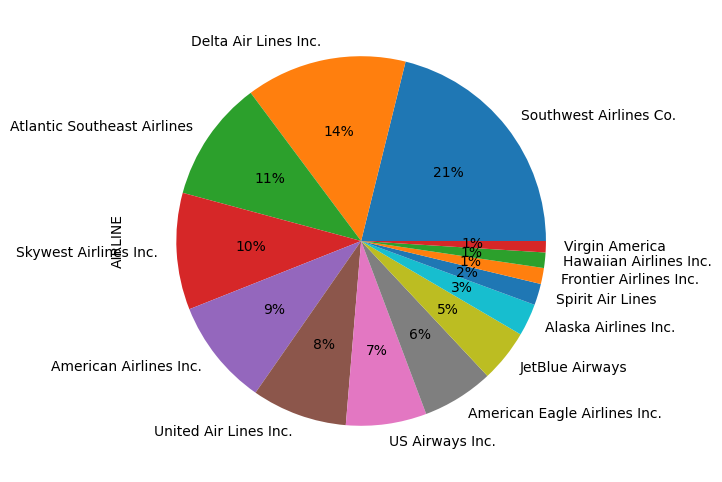

In [25]:
# Plot a Pie Chart 
df.AIRLINE.value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(6,6))

SouthWest Airlines Co is flies most by 21% 

In [26]:
# Compare the airline count
# Calculate the count of each airline
airline_counts = df['AIRLINE'].value_counts()

# Sort the counts in ascending order
airline_counts_sorted = airline_counts.sort_values()


In [27]:
# Create a count plot of the sorted counts
sns.barplot(x=airline_counts_sorted.index, y=airline_counts_sorted.values, palette='Set2')
plt.title("Count of Flights per Airline (Sorted in Ascending Order)")
plt.xlabel('AIRLINE')
plt.xticks(rotation=90) # Rotates the labels on the x-axis for better readability
plt.ylabel('Count')
plt.show()

## CANCELATION REASON

In [28]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'AIRLINE', 'IATA_CODE', 'AIRPORT', 'CITY', 'STATE',
       'COUNTRY', 'LATITUDE', 'LONGITUDE', 'DATE'],
      dtype='object')

<AxesSubplot:ylabel='CANCELLATION_REASON'>

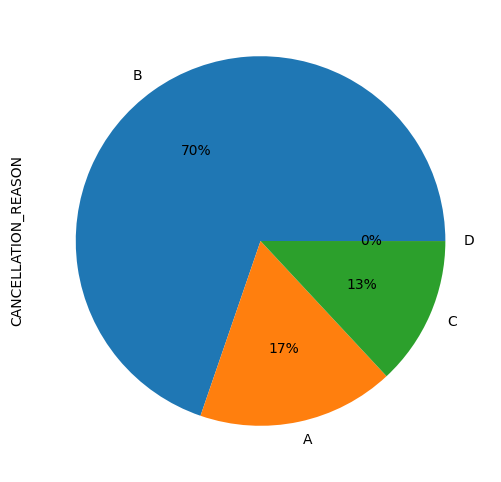

In [29]:
# Plot a Pie Chart 
df.CANCELLATION_REASON.value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(6,6))

## CANCELLED FLIGHTS

In [30]:
# Plot a Pie Chart 
df.CANCELLED.value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(6,6))

<AxesSubplot:ylabel='CANCELLED'>

## Explore 'CANCELLED' and 'DIVERTED' to understand the frequency of cancellations and diversions. 
Analyze the reasons for cancellations using 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'.

In [31]:
import pandas as pd

# Assuming 'df' is your dataframe



# Calculate the total number of flights cancelled and diverted
cancelled_count = df[df['CANCELLED'] == 1]['FLIGHT_NUMBER'].count()
diverted_count = df[df['DIVERTED'] == 1]['FLIGHT_NUMBER'].count()

# Calculate the frequency of cancellations and diversions
cancelled_frequency = cancelled_count / df['FLIGHT_NUMBER'].count() * 100
diverted_frequency = diverted_count / df['FLIGHT_NUMBER'].count() * 100

# Calculate the frequency of cancellations due to system delays, security delays, airline delays, late aircraft delays, and weather delays
system_delay_frequency = df[df['AIR_SYSTEM_DELAY'] == 1]['FLIGHT_NUMBER'].count() / cancelled_count * 100
security_delay_frequency = df[df['SECURITY_DELAY'] == 1]['FLIGHT_NUMBER'].count() / cancelled_count * 100
airline_delay_frequency = df[df['AIRLINE_DELAY'] == 1]['FLIGHT_NUMBER'].count() / cancelled_count * 100
late_aircraft_delay_frequency = df[df['LATE_AIRCRAFT_DELAY'] == 1]['FLIGHT_NUMBER'].count() / cancelled_count * 100
weather_delay_frequency = df[df['WEATHER_DELAY'] == 1]['FLIGHT_NUMBER'].count() / cancelled_count * 100

# Print the results
print("Total number of flights cancelled:", cancelled_count)
print("Total number of flights diverted:", diverted_count)
print("Frequency of cancellations:", cancelled_frequency, "%")
print("Frequency of diversions:", diverted_frequency, "%")
print("Frequency of cancellations due to system delays:", system_delay_frequency, "%")
print("Frequency of cancellations due to security delays:", security_delay_frequency, "%")
print("Frequency of cancellations due to airline delays:", airline_delay_frequency, "%")
print("Frequency of cancellations due to late aircraft delays:", late_aircraft_delay_frequency, "%")
print("Frequency of cancellations due to weather delays:", weather_delay_frequency, "%")


Total number of flights cancelled: 40527
Total number of flights diverted: 2544
Frequency of cancellations: 3.8649595880123027 %
Frequency of diversions: 0.2426149774694228 %
Frequency of cancellations due to system delays: 14.528585881017595 %
Frequency of cancellations due to security delays: 0.04441483455474128 %
Frequency of cancellations due to airline delays: 10.906309373997582 %
Frequency of cancellations due to late aircraft delays: 5.07562859328349 %
Frequency of cancellations due to weather delays: 0.969723887778518 %


## AIRTIME, DISTANCE, ELAPSED TIME, ARRIVAL TIME, SCHEDULE TIME HISTOGRAM 

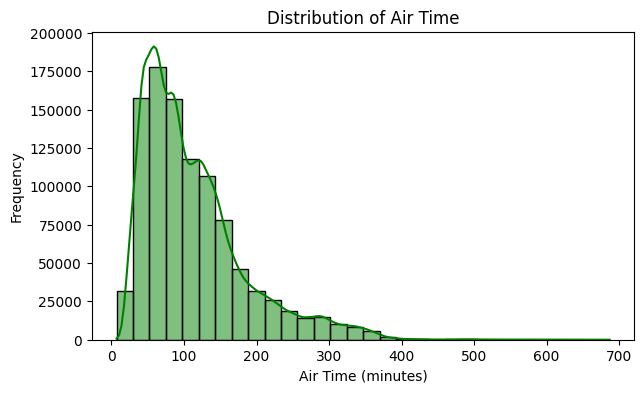

In [32]:
# Plotting Histogram and Density Plot for 'AIR_TIME'
plt.figure(figsize=(7, 4))
sns.histplot(df['AIR_TIME'], kde=True, bins=30, color='green')
plt.title('Distribution of Air Time')
plt.xlabel('Air Time (minutes)')

plt.ylabel('Frequency')
plt.show()



This means the of minutes the Plane spends mostly in the air is between 0-400 mins. On the average is 112 mins, median is 94. 

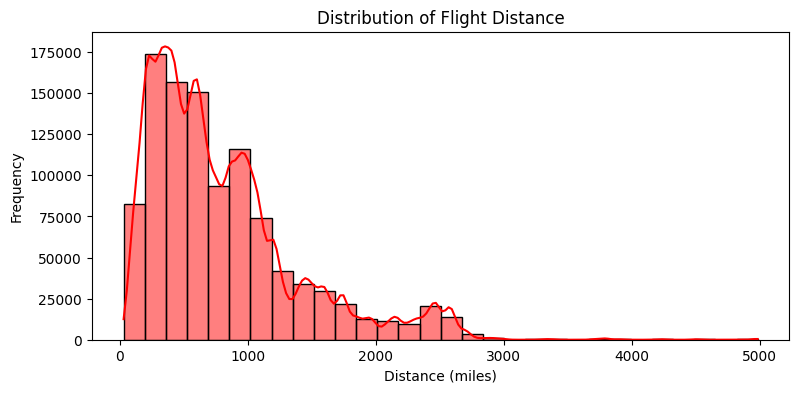

In [33]:
# Plotting Histogram and Density Plot for 'DISTANCE'
plt.figure(figsize=(9, 4))
sns.histplot(df['DISTANCE'], kde=True, bins=30, color='red')
plt.title('Distribution of Flight Distance')
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')
plt.show()

The distance traveled is over 5000 miles but flies between 0-3000 miles frequently, on the average of 803
miles with median as 641miles. Which also means they deal mostly with local flights.

# ELAPSED TIME

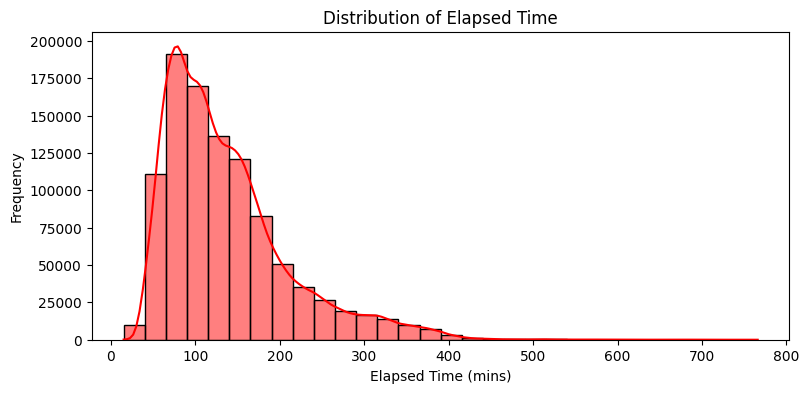

In [34]:
# Plotting Histogram and Density Plot for 'DISTANCE'
plt.figure(figsize=(9, 4))
sns.histplot(df['ELAPSED_TIME'], kde=True, bins=30, color='red')
plt.title('Distribution of Elapsed Time')
plt.xlabel('Elapsed Time (mins)')
plt.ylabel('Frequency')
plt.show()

The data is postively/right skewed and the Elapsed time data is concentrated on the left side, with an average time of 137 mins AND median is 119 mins  

## TAXI OUT

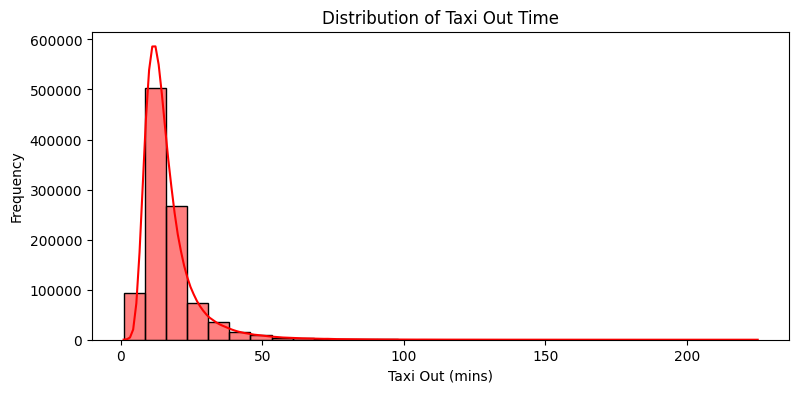

In [35]:
# Plotting Histogram and Density Plot for 'TAXI OUT'
plt.figure(figsize=(9, 4))
sns.histplot(df['TAXI_OUT'], kde=True, bins=30, color='red')
plt.title('Distribution of Taxi Out Time')
plt.xlabel('Taxi Out (mins)')
plt.ylabel('Frequency')
plt.show()

The average time it takes for a plane to Taxi out is 16mins while median is 14 mins.

## TAXI IN

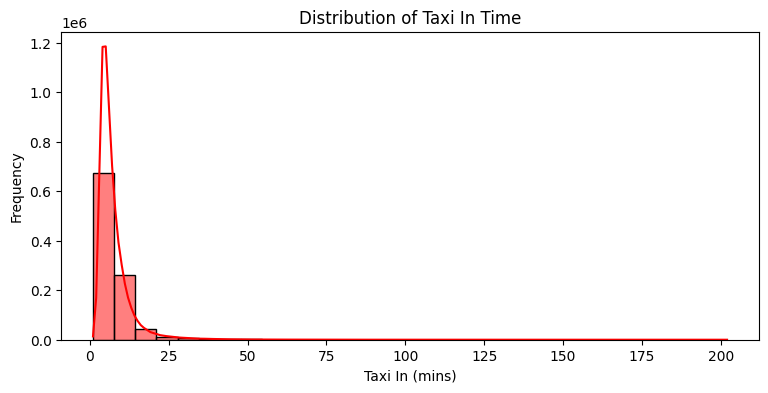

In [36]:
# Plotting Histogram and Density Plot for 'TAXI OUT'
plt.figure(figsize=(9, 4))
sns.histplot(df['TAXI_IN'], kde=True, bins=30, color='red')
plt.title('Distribution of Taxi In Time')
plt.xlabel('Taxi In (mins)')
plt.ylabel('Frequency')
plt.show()

The average time it takes for a flight to Taxi In is 7mins and median is 6mins.

## DELAY SYSTEMS ANALYSIS.

## DEPARTURE DELAY

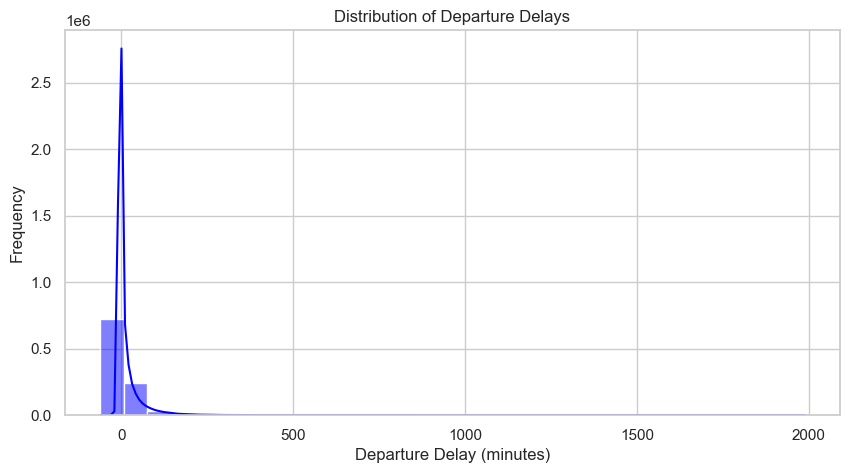

In [37]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Plotting Histogram and Density Plot for 'DEPARTURE_DELAY'
plt.figure(figsize=(10, 5))
sns.histplot(df['DEPARTURE_DELAY'], kde=True, bins=30, color='blue')
plt.title('Distribution of Departure Delays')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Frequency')
plt.show()

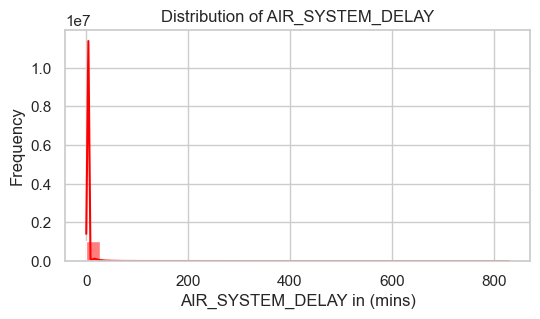

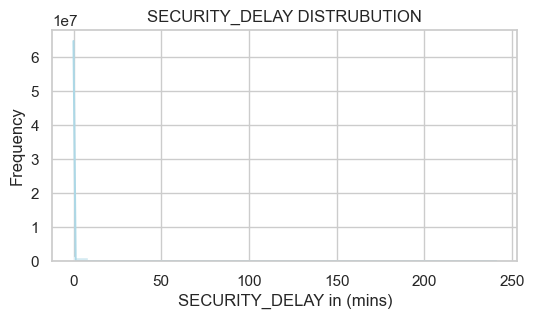

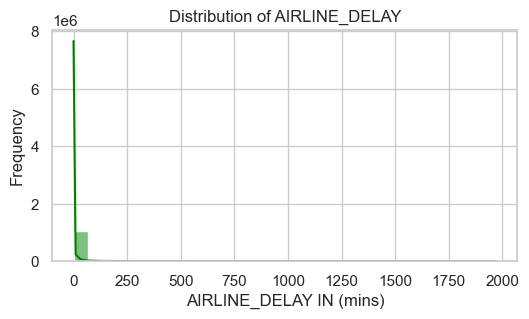

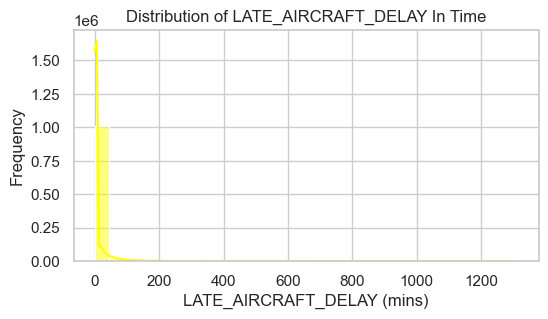

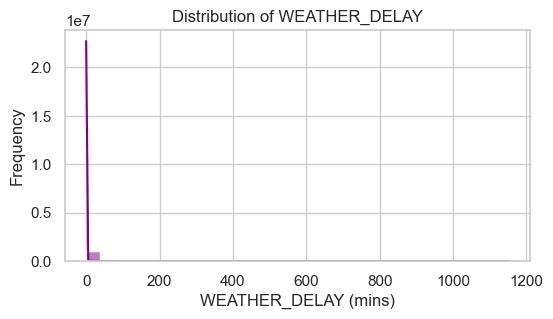

In [38]:
# Plotting Histogram and Density Plot for 'AIR_SYSTEM_DELAY'
plt.figure(figsize=(6, 3))
sns.histplot(df['AIR_SYSTEM_DELAY'], kde=True, bins=30, color='red')
plt.title('Distribution of AIR_SYSTEM_DELAY')
plt.xlabel('AIR_SYSTEM_DELAY in (mins)')
plt.ylabel('Frequency')
plt.show()

# Plotting Histogram and Density Plot for 'SECURITY_DELAY'
plt.figure(figsize=(6, 3))
sns.histplot(df['SECURITY_DELAY'], kde=True, bins=30, color='lightblue')
plt.title('SECURITY_DELAY DISTRUBUTION')
plt.xlabel('SECURITY_DELAY in (mins)')
plt.ylabel('Frequency')
plt.show()

# Plotting Histogram and Density Plot for 'AIRLINE_DELAY'
plt.figure(figsize=(6, 3))
sns.histplot(df['AIRLINE_DELAY'], kde=True, bins=30, color='green')
plt.title('Distribution of AIRLINE_DELAY')
plt.xlabel('AIRLINE_DELAY IN (mins)')
plt.ylabel('Frequency')
plt.show()

# Plotting Histogram and Density Plot for 'LATE_AIRCRAFT_DELAY'
plt.figure(figsize=(6, 3))
sns.histplot(df['LATE_AIRCRAFT_DELAY'], kde=True, bins=30, color='yellow')
plt.title('Distribution of LATE_AIRCRAFT_DELAY In Time')
plt.xlabel('LATE_AIRCRAFT_DELAY (mins)')
plt.ylabel('Frequency')
plt.show()

# Plotting Histogram and Density Plot for  'WEATHER_DELAY'
plt.figure(figsize=(6, 3))
sns.histplot(df[ 'WEATHER_DELAY'], kde=True, bins=30, color='purple')
plt.title('Distribution of WEATHER_DELAY')
plt.xlabel('WEATHER_DELAY (mins)')
plt.ylabel('Frequency')
plt.show()

Here on the average.... 
Air System Delay was on the average of 4mins.
Security Delay was on the average of 6 secs.
Airline Delay had an average of 5 mins.
Late Aircraft Delay had an average of 8 mins.
Weather delay had an average of 42 secs.
while Arrival Delay was on the average of 7mins.

## Top 10 most frequent airports

In [39]:
# Count the number of flights of each airport in the 'ORIGIN_AIRPORT' column
airport_counts = df['AIRPORT'].value_counts()

# Select the top 10 most frequent airports
top_10_airports = airport_counts.head(10)

# Print the top 10 airports
print("Top 10 Airports:")
print(top_10_airports)

Top 10 Airports:
Hartsfield-Jackson Atlanta International Airport    66599
Chicago O'Hare International Airport                52961
Dallas/Fort Worth International Airport             50933
Los Angeles International Airport                   38473
Denver International Airport                        38254
George Bush Intercontinental Airport                29802
Phoenix Sky Harbor International Airport            29262
San Francisco International Airport                 28428
McCarran International Airport                      25806
Orlando International Airport                       22575
Name: AIRPORT, dtype: int64


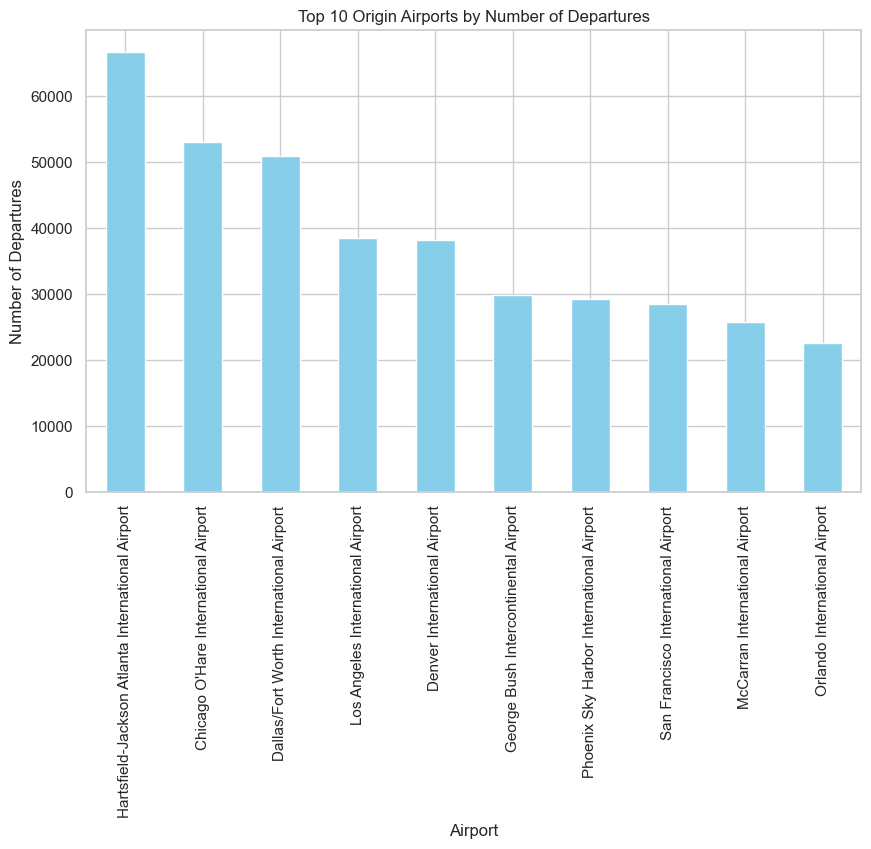

In [40]:
# Plotting the bar chart of top 10 most frequent airports
plt.figure(figsize=(10, 6))
top_10_airports.plot(kind='bar', color='skyblue')

plt.title('Top 10 Origin Airports by Number of Departures')
plt.xlabel('Airport')
plt.ylabel('Number of Departures')
plt.xticks(rotation=90)  # Rotates the labels on the x-axis for better readability
plt.show()

## This chart show the busiest airports by descending order. 
The busiest airport is Hartsfield-Jackson Atlanta Int'l Airport.


In [41]:
# Count the number of occurrences of each airport in the 'DESTINATION_AIRPORT' column
airport_counts = df['AIRPORT'].value_counts()

# Select the top 10 most frequent airports
last_10_airports = airport_counts.tail(10)

# Print the last 10 airports
print("last 10 Destination Airports:")
print(last_10_airports)

last 10 Destination Airports:
Kodiak Airport                                                67
Sawyer International Airport                                  59
Wilmington Airport                                            55
Southwest Oregon Regional Airport (North Bend Municipal)      39
Greater Binghamton Airport                                    38
Northeast Florida Regional Airport (St. Augustine Airport)    33
Bangor International Airport                                  22
Pago Pago International Airport (Tafuna Airport)              21
Adak Airport                                                  20
Ithaca Tompkins Regional Airport                               6
Name: AIRPORT, dtype: int64


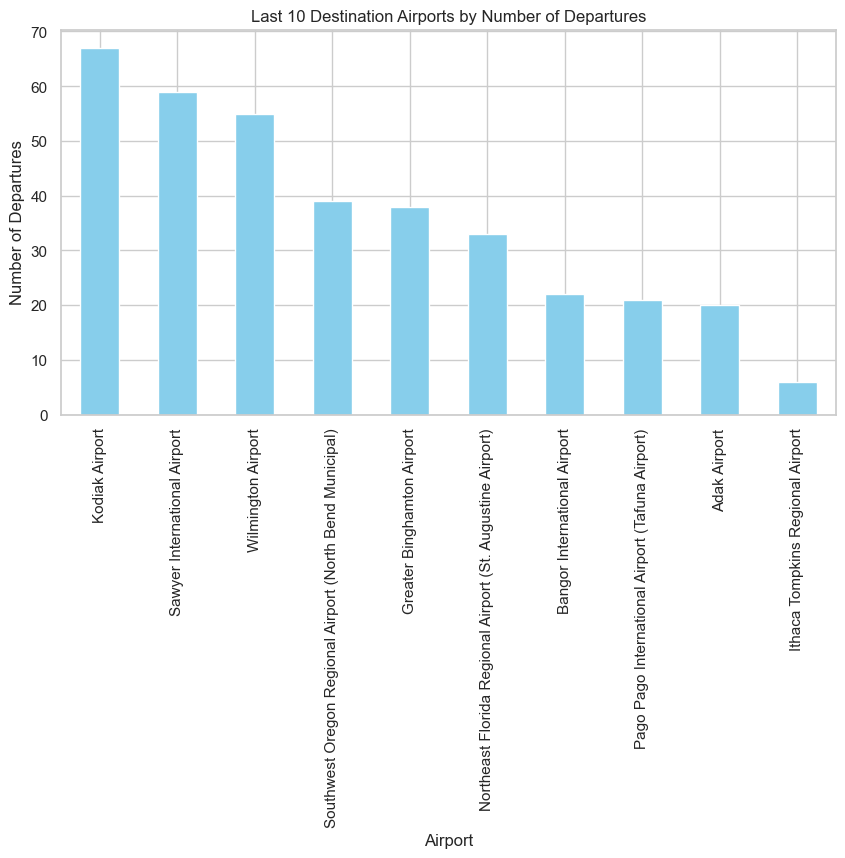

In [42]:
# Plotting the bar chart of last 10 frequent airports
plt.figure(figsize=(10, 5))
last_10_airports.plot(kind='bar', color='skyblue')

plt.title('Last 10 Destination Airports by Number of Departures')
plt.xlabel('Airport')
plt.ylabel('Number of Departures')
plt.xticks(rotation=90)  # Rotates the labels on the x-axis for better readability
plt.show()

This chart shows the least visited airport in ascending order by the right. Here the airports are not so busy. 
Ithaca Tompkins Regional Airport is the least busiest Airport.

## TOP 10 CITIES & STATE THAT FLIES MOST.


In [43]:
# Count the number of flights of each airport by CITY column
city_counts = df['CITY'].value_counts()

# Select the top 10 most frequent airports
top_10_cities = city_counts.head(10)

# Print the top 10 city
print("Top 10 Cities with the Highest Flights:")
print(top_10_cities)

Top 10 Cities with the Highest Flights:
Chicago              67873
Atlanta              66599
Dallas-Fort Worth    50933
New York             40378
Houston              40052
Los Angeles          38473
Denver               38254
Phoenix              29262
San Francisco        28428
Las Vegas            25806
Name: CITY, dtype: int64


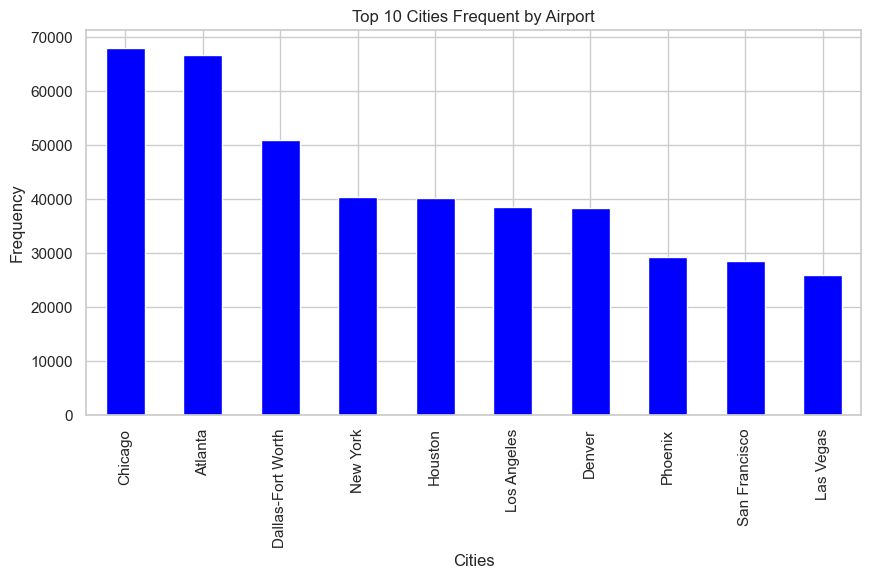

In [44]:
# Plotting the bar chart of TOP 10 frequent CITIES
plt.figure(figsize=(10, 5))
top_10_cities.plot(kind='bar', color='blue')

plt.title('Top 10 Cities Frequent by Airport')
plt.xlabel('Cities')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotates the labels on the x-axis for better readability
plt.show()

In [45]:
# Count the number of flights of each airport by CITY column
state_counts = df['STATE'].value_counts()

# Select the top 10 most frequent airports
top_10_states = state_counts.head(10)

# Print the top 10 state
print("Top 10 State with the Highest Flights:")
print(top_10_states)

Top 10 State with the Highest Flights:
TX    129139
CA    127639
FL     88978
IL     70943
GA     69181
NY     50283
CO     43790
AZ     33244
NC     29482
VA     28495
Name: STATE, dtype: int64


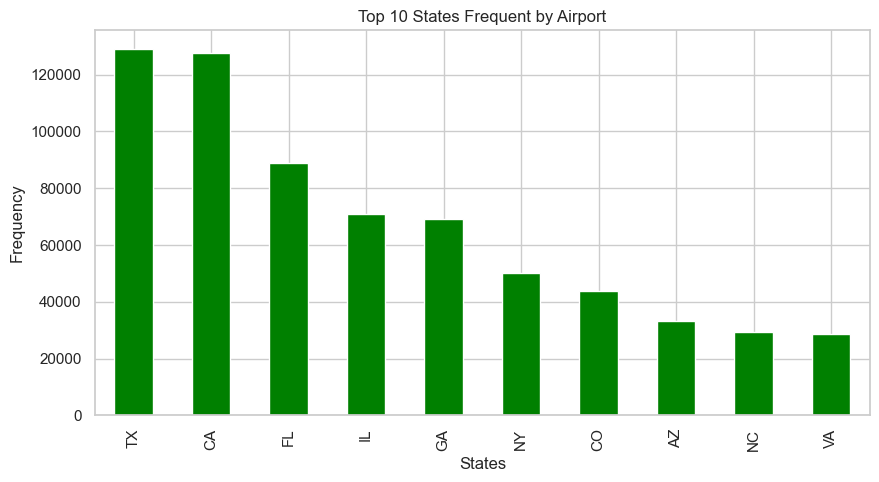

In [46]:
# Plotting the bar chart of TOP 10 frequent STATES
plt.figure(figsize=(10, 5))
top_10_states.plot(kind='bar', color='green')

plt.title('Top 10 States Frequent by Airport')
plt.xlabel('States')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotates the labels on the x-axis for better readability
plt.show()

## STATES & CITIES WITH LESSER FLIGHTS.

In [47]:
# Count the number of flights of each airport by CITY column
city_counts = df['CITY'].value_counts()

# Select the top 10 most frequent airports
last_10_cities = city_counts.tail(10)

# Print the top 10 city
print("Last 10 Cities with the Lesser Flights:")
print(last_10_cities)

Last 10 Cities with the Lesser Flights:
Plattsburgh      68
Kodiak           67
Marquette        59
North Bend       39
Binghamton       38
St. Augustine    33
Bangor           22
Pago Pago        21
Adak             20
Ithaca            6
Name: CITY, dtype: int64


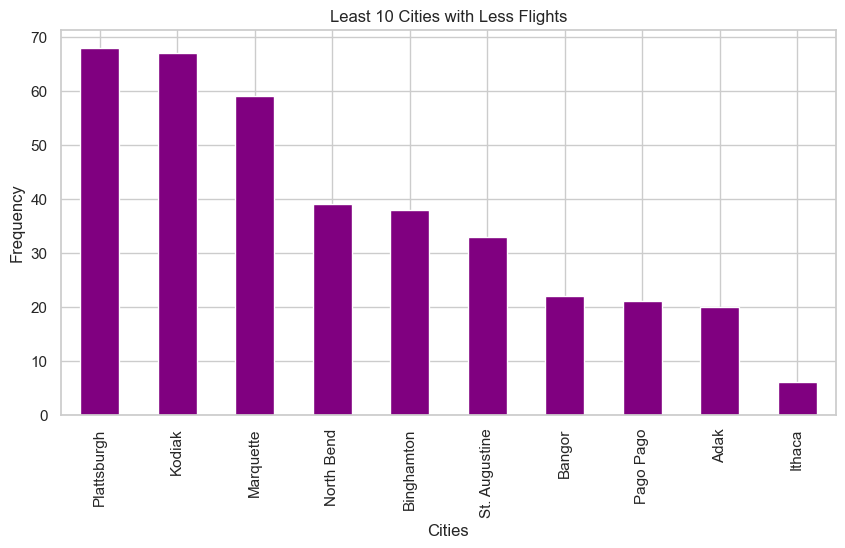

In [48]:
# Plotting the bar chart of Last 10 Cities with Lesser Flights 
plt.figure(figsize=(10, 5))
last_10_cities.plot(kind='bar', color='purple')

plt.title('Least 10 Cities with Less Flights')
plt.xlabel('Cities')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotates the labels on the x-axis for better readability
plt.show()

In [49]:
# Count the number of flights of each airport by STATE column
state_counts = df['STATE'].value_counts()

# Select the top 10 most frequent airports
last_10_state = state_counts.tail(10)

# Print the top 10 city
print("Last 10 State with the Lesser Flights:")
print(last_10_state)

Last 10 State with the Lesser Flights:
SD    1936
WY    1858
VI    1249
NH    1049
ME     600
VT     488
WV     414
GU      69
DE      55
AS      21
Name: STATE, dtype: int64


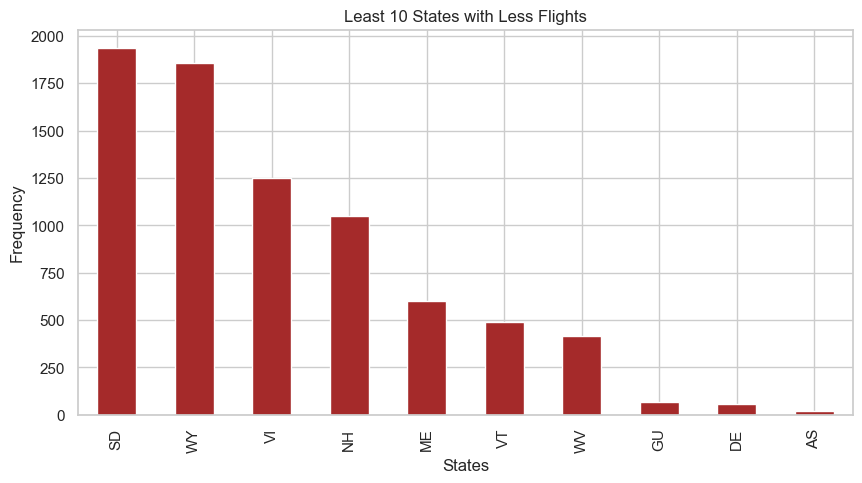

In [50]:
# Plotting the bar chart of Last 10 STATE with Lesser Flights 
plt.figure(figsize=(10, 5))
last_10_state.plot(kind='bar', color='brown')

plt.title('Least 10 States with Less Flights')
plt.xlabel('States')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotates the labels on the x-axis for better readability
plt.show()

Arkansas, Delaware,  are the states with the least Flights in USA.


## BIVARIATE ANALYSIS

In [51]:
# Group by 'AIRPORT' and calculate the mean 'DEPARTURE_DELAY' for each airport.
 # Top 10 origin airports with the highest average departure delays. 
# The groupby method groups the data by ORIGIN_AIRPORT, and then for each group, 
# the mean of DEPARTURE_DELAY is calculated.
average_delays = df.groupby('AIRPORT')['DEPARTURE_DELAY'].mean()

# Sort the airports by average delay in descending order
sorted_delays = average_delays.sort_values(ascending=False)

# Select the top 10 airports with the highest average delay
top_10_airports_delay = sorted_delays.head(10)

# Print the top 10 airports
print("Top 10 Airports by Average Departure Delay:")
print(top_10_airports_delay)

Top 10 Airports by Average Departure Delay:
AIRPORT
Trenton Mercer Airport                                      39.761711
Wilmington Airport                                          34.711538
Southwest Oregon Regional Airport (North Bend Municipal)    26.305556
University Park Airport                                     24.116788
Aberdeen Regional Airport                                   23.261194
Santa Maria Public Airport (Capt G. Allan Hancock Field)    22.984962
Jack Brooks Regional Airport (Southeast Texas Regional)     22.842697
Del Norte County Airport (Jack McNamara Field)              22.311475
Bangor International Airport                                21.900000
University of Illinois - Willard Airport                    21.630542
Name: DEPARTURE_DELAY, dtype: float64


 The above detail are the top 10 Airports with the highest average departure delays.

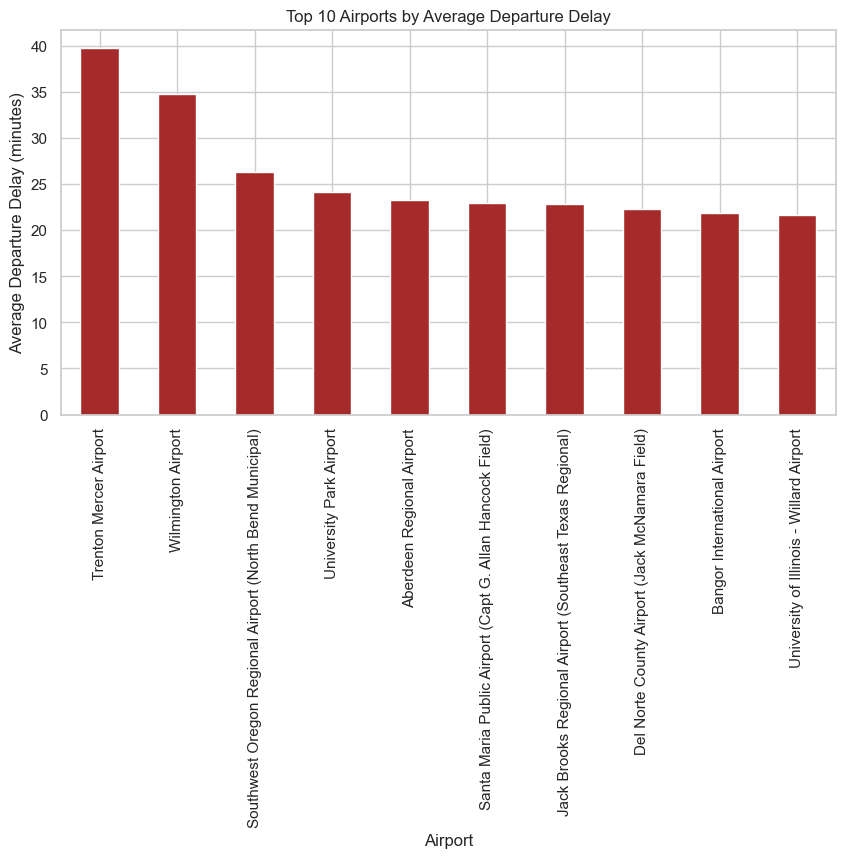

In [52]:
# Plotting the bar chart
plt.figure(figsize=(10,5))
top_10_airports_delay.plot(kind='bar', color='brown')

plt.title('Top 10 Airports by Average Departure Delay')
plt.xlabel('Airport')
plt.ylabel('Average Departure Delay (minutes)')
plt.xticks(rotation=90)  # Rotates the labels on the x-axis for better readability

plt.show()

This chart shows that University of Illinois -Willard Airport has the least average delay by over 22 mins.

## TOTAL FLIGHTS PER AIRLINE 

In [53]:
airori = df.groupby("AIRLINE")[["ORIGIN_AIRPORT"]].count().reset_index()
airori= pd.melt(airori, id_vars="AIRLINE", var_name="Metric",value_name="TOTAL")
airori

AIRLINE          Metric   TOTAL
0           Alaska Airlines Inc.  ORIGIN_AIRPORT   29614
1         American Airlines Inc.  ORIGIN_AIRPORT   97549
2   American Eagle Airlines Inc.  ORIGIN_AIRPORT   65513
3    Atlantic Southeast Airlines  ORIGIN_AIRPORT  111206
4           Delta Air Lines Inc.  ORIGIN_AIRPORT  147486
5         Frontier Airlines Inc.  ORIGIN_AIRPORT   14669
6         Hawaiian Airlines Inc.  ORIGIN_AIRPORT   14133
7                JetBlue Airways  ORIGIN_AIRPORT   48157
8          Skywest Airlines Inc.  ORIGIN_AIRPORT  107099
9         Southwest Airlines Co.  ORIGIN_AIRPORT  221586
10              Spirit Air Lines  ORIGIN_AIRPORT   19612
11               US Airways Inc.  ORIGIN_AIRPORT   73942
12         United Air Lines Inc.  ORIGIN_AIRPORT   87606
13                Virgin America  ORIGIN_AIRPORT   10403

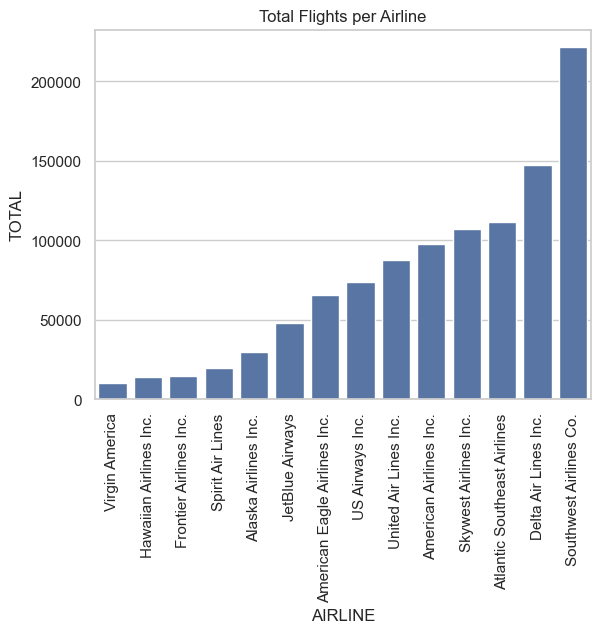

In [54]:
        
airori.drop(columns="Metric", inplace=True)
airori.sort_values(by="TOTAL", ascending=True, inplace=True)
sns.barplot(x="AIRLINE", y="TOTAL", data=airori)  # Add a closing parenthesis here
plt.xticks(rotation=90) # Rotates the labels on the x-axis for better readability
plt.title('Total Flights per Airline')
plt.show()
            



This barchart reveals the Total flights per Airline in Ascending Order with SouthWest Airlines Co. & Delta Airlines Inc leading the chart. 

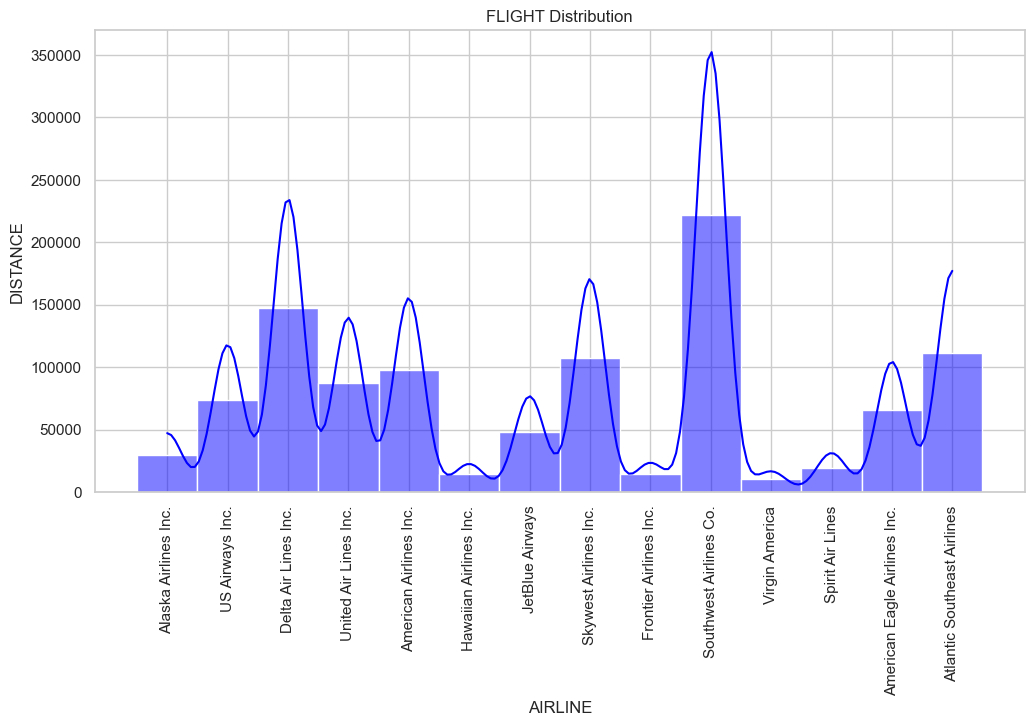

In [55]:
#Histogram and KDE "DISTANCE" and 'AIRLINE' 
plt.figure(figsize=(12, 6))
sns.histplot(df['AIRLINE'], kde=True, color='blue', bins=30)
plt.title('FLIGHT Distribution')
plt.xlabel('AIRLINE')
plt.xticks(rotation=90) # Rotates the labels on the x-axis for better readability
plt.ylabel('DISTANCE')
plt.show()

SouthWest Airlines Inc. Travel more distance... Which means they have more international flights 

## DEPARTURE DELAY BY LEVEL 

### delay_type = lambda x:((0,1)[x > 5],2)[x > 45]: This line defines a lambda function delay_type that takes a value x ### as input and returns one of three possible values: 0 (no delay), 1 (moderate delay), or 2 (severe delay). 
### The lambda function uses a nested conditional expression to determine the delay level. 
### If x is greater than 5 but not greater than 45, the function returns 1 (moderate delay).
### If x is greater than 45, the function returns 2 (severe delay). Otherwise, the function returns 0 (no delay).

### df['DELAY_LEVEL'] = df['DEPARTURE_DELAY'].apply(delay_type): This line applies the delay_type function to each value in the 'DEPARTURE_DELAY' column of the dataframe df. 
    # The result is a new column 'DELAY_LEVEL' in the dataframe df, which contains the delay levels for each airline.



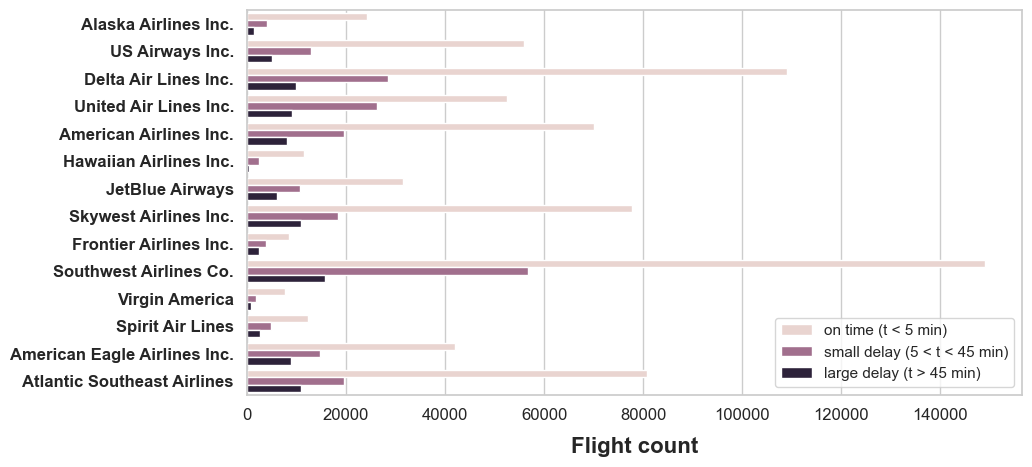

In [56]:
delay_type = lambda x:((0,1)[x > 5],2)[x > 45] 
df['DELAY_LEVEL'] = df['DEPARTURE_DELAY'].apply(delay_type)
fig = plt.figure(1, figsize=(10,5)) 
ax = sns.countplot(y="AIRLINE", hue='DELAY_LEVEL', data=df)
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Flight count', fontsize=16, weight = 'bold', labelpad=10)
L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')
plt.show()

This figure gives a count of the delays of less than 5 minutes, those in the range 5 < t < 45 min and finally, 
the delays greater than 45 minutes.

SouthWest Airlines Co is leading the chart with more flights arriving on time and the largest delay of t>45 min.


# Delays: take-off or landing ?

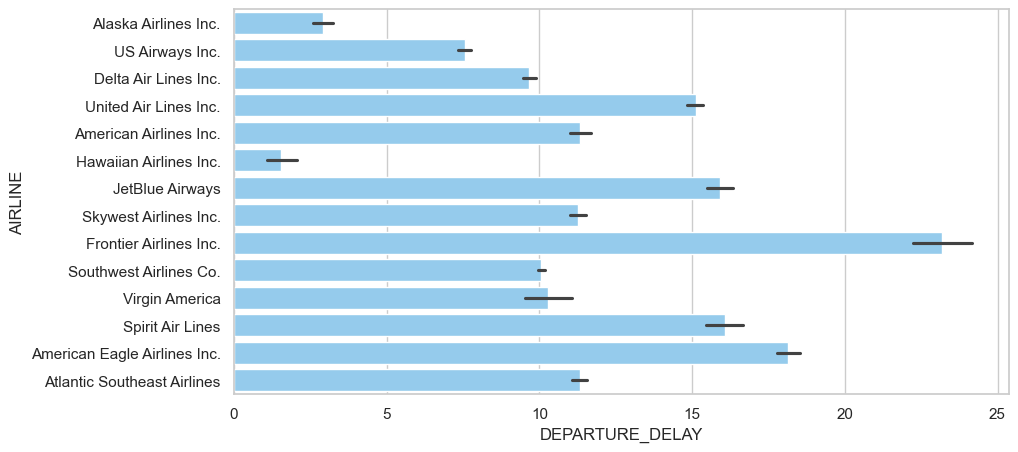

In [57]:
fig = plt.figure(1, figsize=(10,5))
ax = sns.barplot(x="DEPARTURE_DELAY", y="AIRLINE", data=df, color="lightskyblue")
plt. show()

The above chart show departure delay by taking off, where FRONTIER Airline delayed most with over 25mins and American Eagle with over 18mins delay in departure.

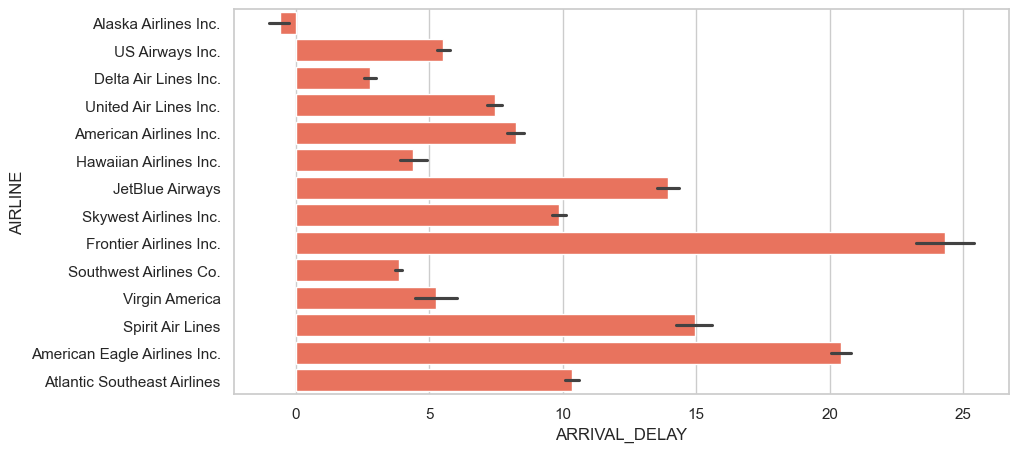

In [58]:
fig = plt.figure(1, figsize=(10,5))
ax = sns.barplot(x="ARRIVAL_DELAY", y="AIRLINE", data=df, color="tomato")
plt. show()

Here Alaska Airline Inc arrived earlier than scheduled, Delta Airline arrived 3mins Late.

## Box plots for the columns 'SCHEDULED_TIME', 'ELAPSED_TIME', and 'AIR_TIME

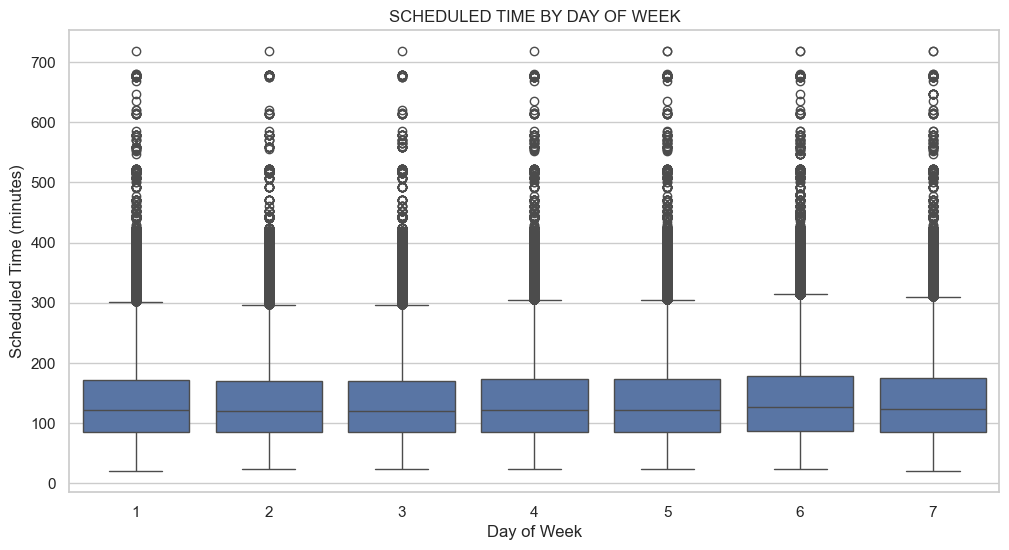

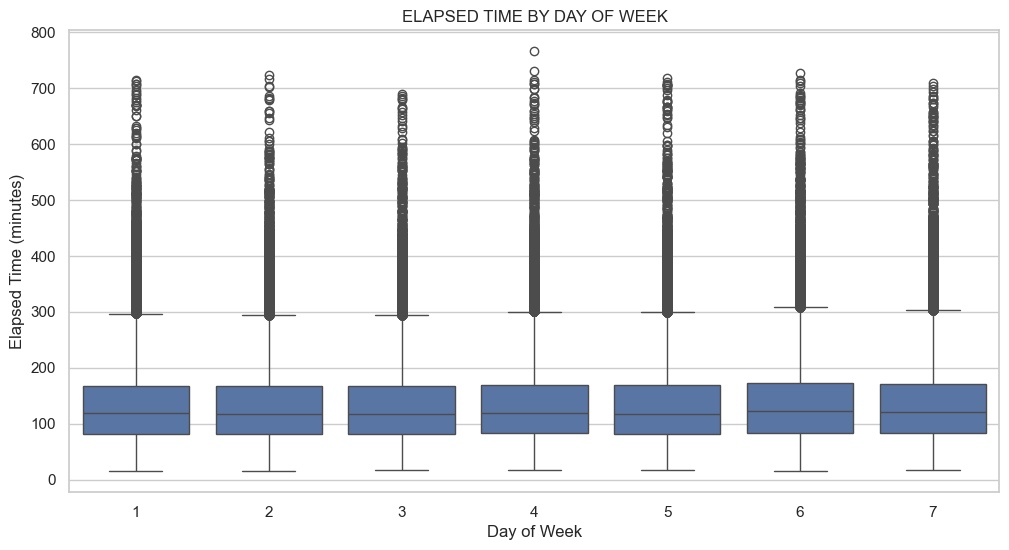

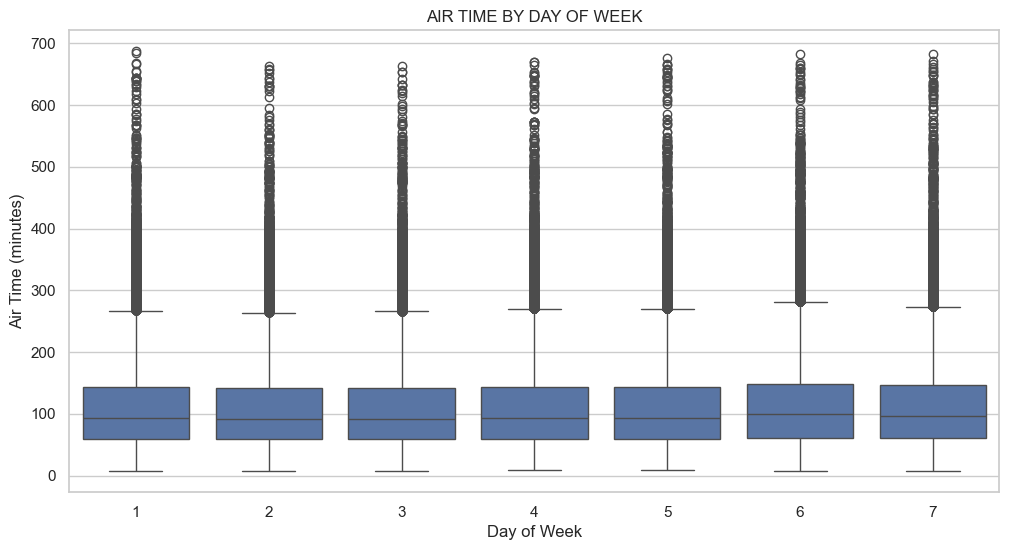

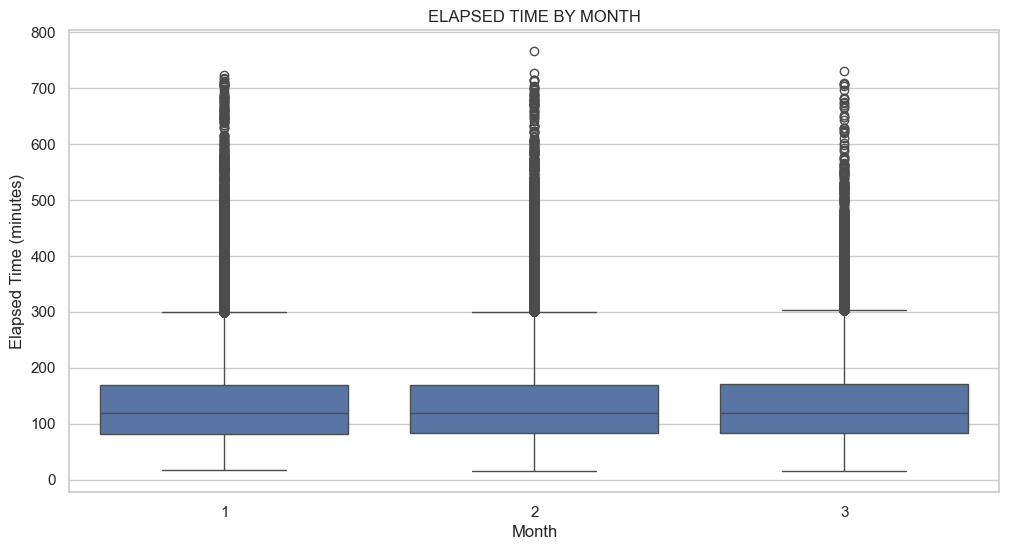

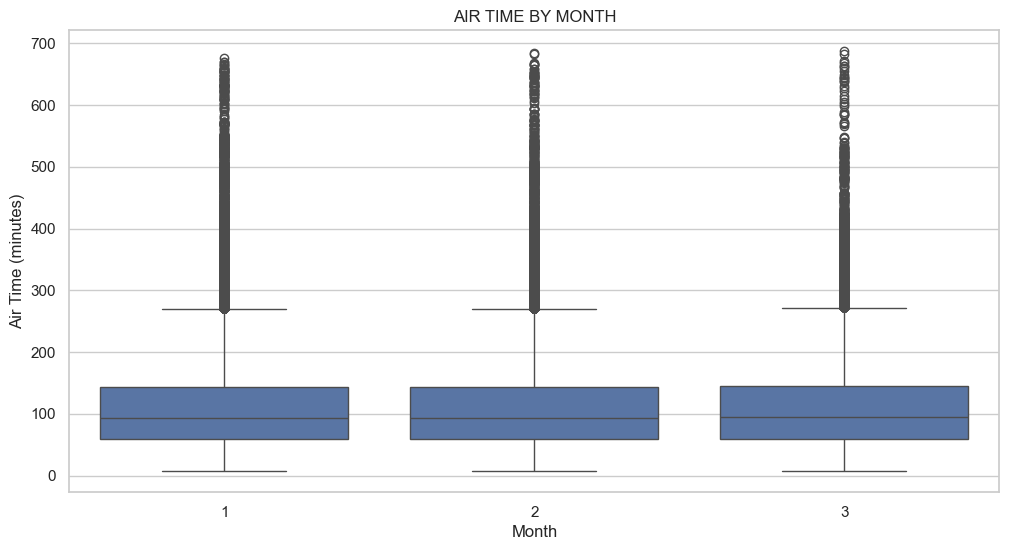

In [59]:


plt.figure(figsize=(12, 6))
sns.boxplot(x="DAY_OF_WEEK", y="SCHEDULED_TIME", data=df)
plt.title('SCHEDULED TIME BY DAY OF WEEK')
plt.xlabel("Day of Week")
plt.ylabel('Scheduled Time (minutes)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x="DAY_OF_WEEK", y="ELAPSED_TIME", data=df)
plt.title('ELAPSED TIME BY DAY OF WEEK')
plt.xlabel("Day of Week")
plt.ylabel('Elapsed Time (minutes)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x="DAY_OF_WEEK", y="AIR_TIME", data=df)
plt.title('AIR TIME BY DAY OF WEEK')
plt.xlabel("Day of Week")
plt.ylabel('Air Time (minutes)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x="MONTH", y="SCHEDULED_TIME", data=df)
plt.title('SCHEDULED TIME BY MONTH')
plt.xlabel("Month")
plt.ylabel('Scheduled Time (minutes)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x="MONTH", y="ELAPSED_TIME", data=df)
plt.title('ELAPSED TIME BY MONTH')
plt.xlabel("Month")
plt.ylabel('Elapsed Time (minutes)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x="MONTH", y="AIR_TIME", data=df)
plt.title('AIR TIME BY MONTH')
plt.xlabel("Month")
plt.ylabel('Air Time (minutes)')
plt.show()

The distribution of the flights are all skewed to the right and have outliers.


## Relationships between the Numerical variables

In [60]:
# if there is a correlation between the delays registered and the airport of origin.
# Recall that in the dataset, the number of airports considered is:

In [61]:
print("Nb of airports: {}".format(len(df['ORIGIN_AIRPORT'].unique())))

Nb of airports: 315


In [62]:
# Boxplot to visualize the distribution of delays per airline
plt.figure(figsize=(10, 4))
sns.boxplot(x='AIRLINE', y='DEPARTURE_DELAY', data=df)
plt.title('Distribution of Departure Delays Across AIRLINES')
plt.xlabel('AIRLINE')
plt.xticks(rotation=90) 
plt.ylabel('Departure Delay (minutes)')
plt.show()

This shows there are outliers in the above data. 

## SCATTER PLOT.

### To determine if there exist a realtionship between Distance & Airtime with Arrival Delay & Departure Delay.

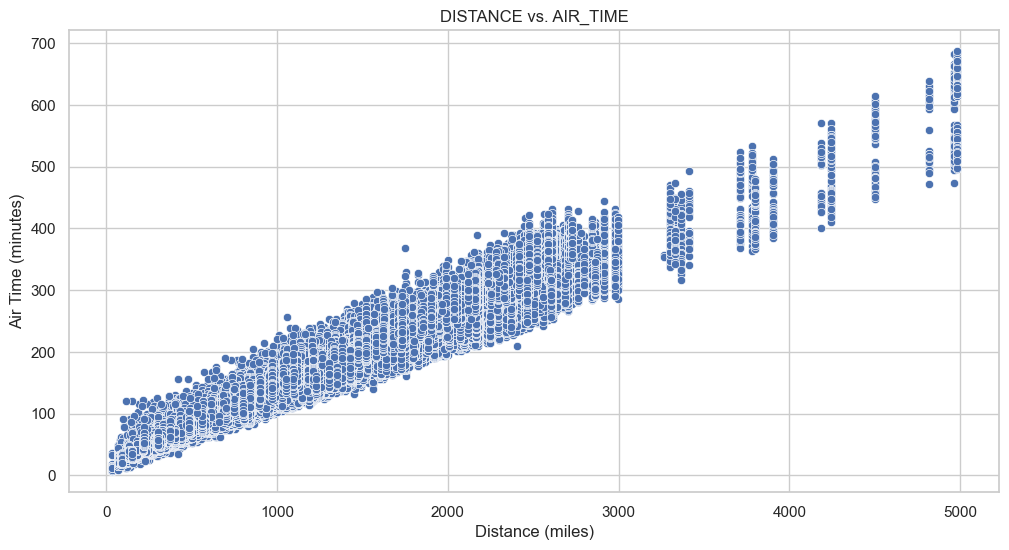

In [63]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="DISTANCE", y="AIR_TIME", data=df)
plt.title('DISTANCE vs. AIR_TIME')
plt.xlabel("Distance (miles)")
plt.ylabel('Air Time (minutes)')
plt.show()

There exist a relationship between Airtime (minutes) and Distance by miles. Therefore as the distance increase more time was spent in the Air.

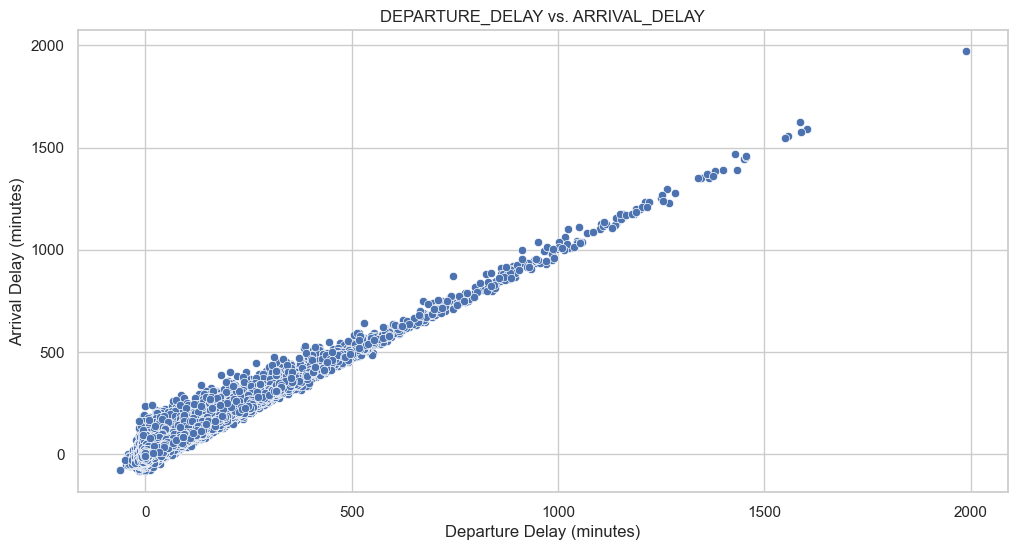

In [64]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="DEPARTURE_DELAY", y="ARRIVAL_DELAY", data=df)
plt.title('DEPARTURE_DELAY vs. ARRIVAL_DELAY')
plt.xlabel("Departure Delay (minutes)")
plt.ylabel('Arrival Delay (minutes)')
plt.show()

There is a linear relationship that exist between the Arrival Delay and Departure Delay.

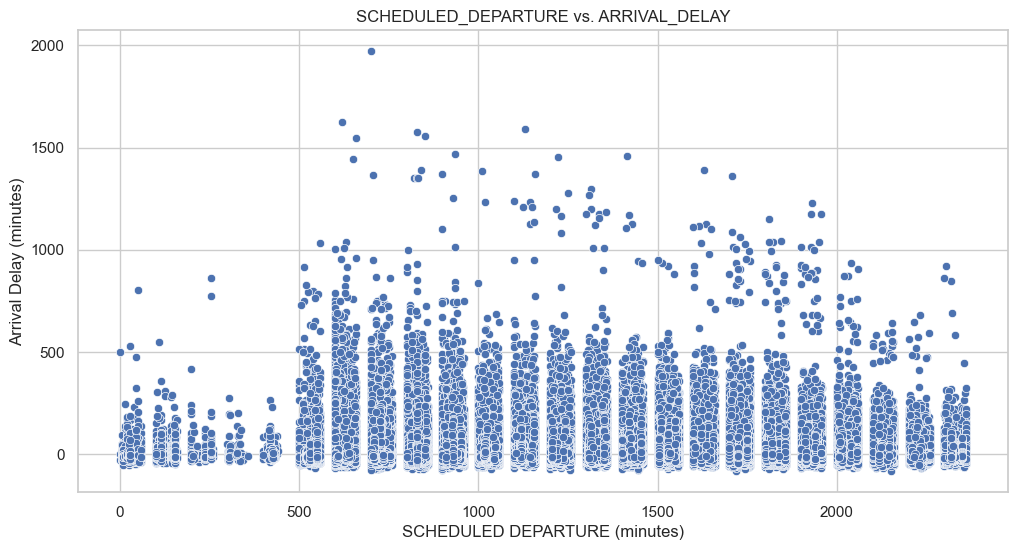

In [65]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="SCHEDULED_DEPARTURE", y="ARRIVAL_DELAY", data=df)
plt.title('SCHEDULED_DEPARTURE vs. ARRIVAL_DELAY')
plt.xlabel("SCHEDULED DEPARTURE (minutes)")
plt.ylabel('Arrival Delay (minutes)')
plt.show()

## MULTIVARIATE ANALYSIS

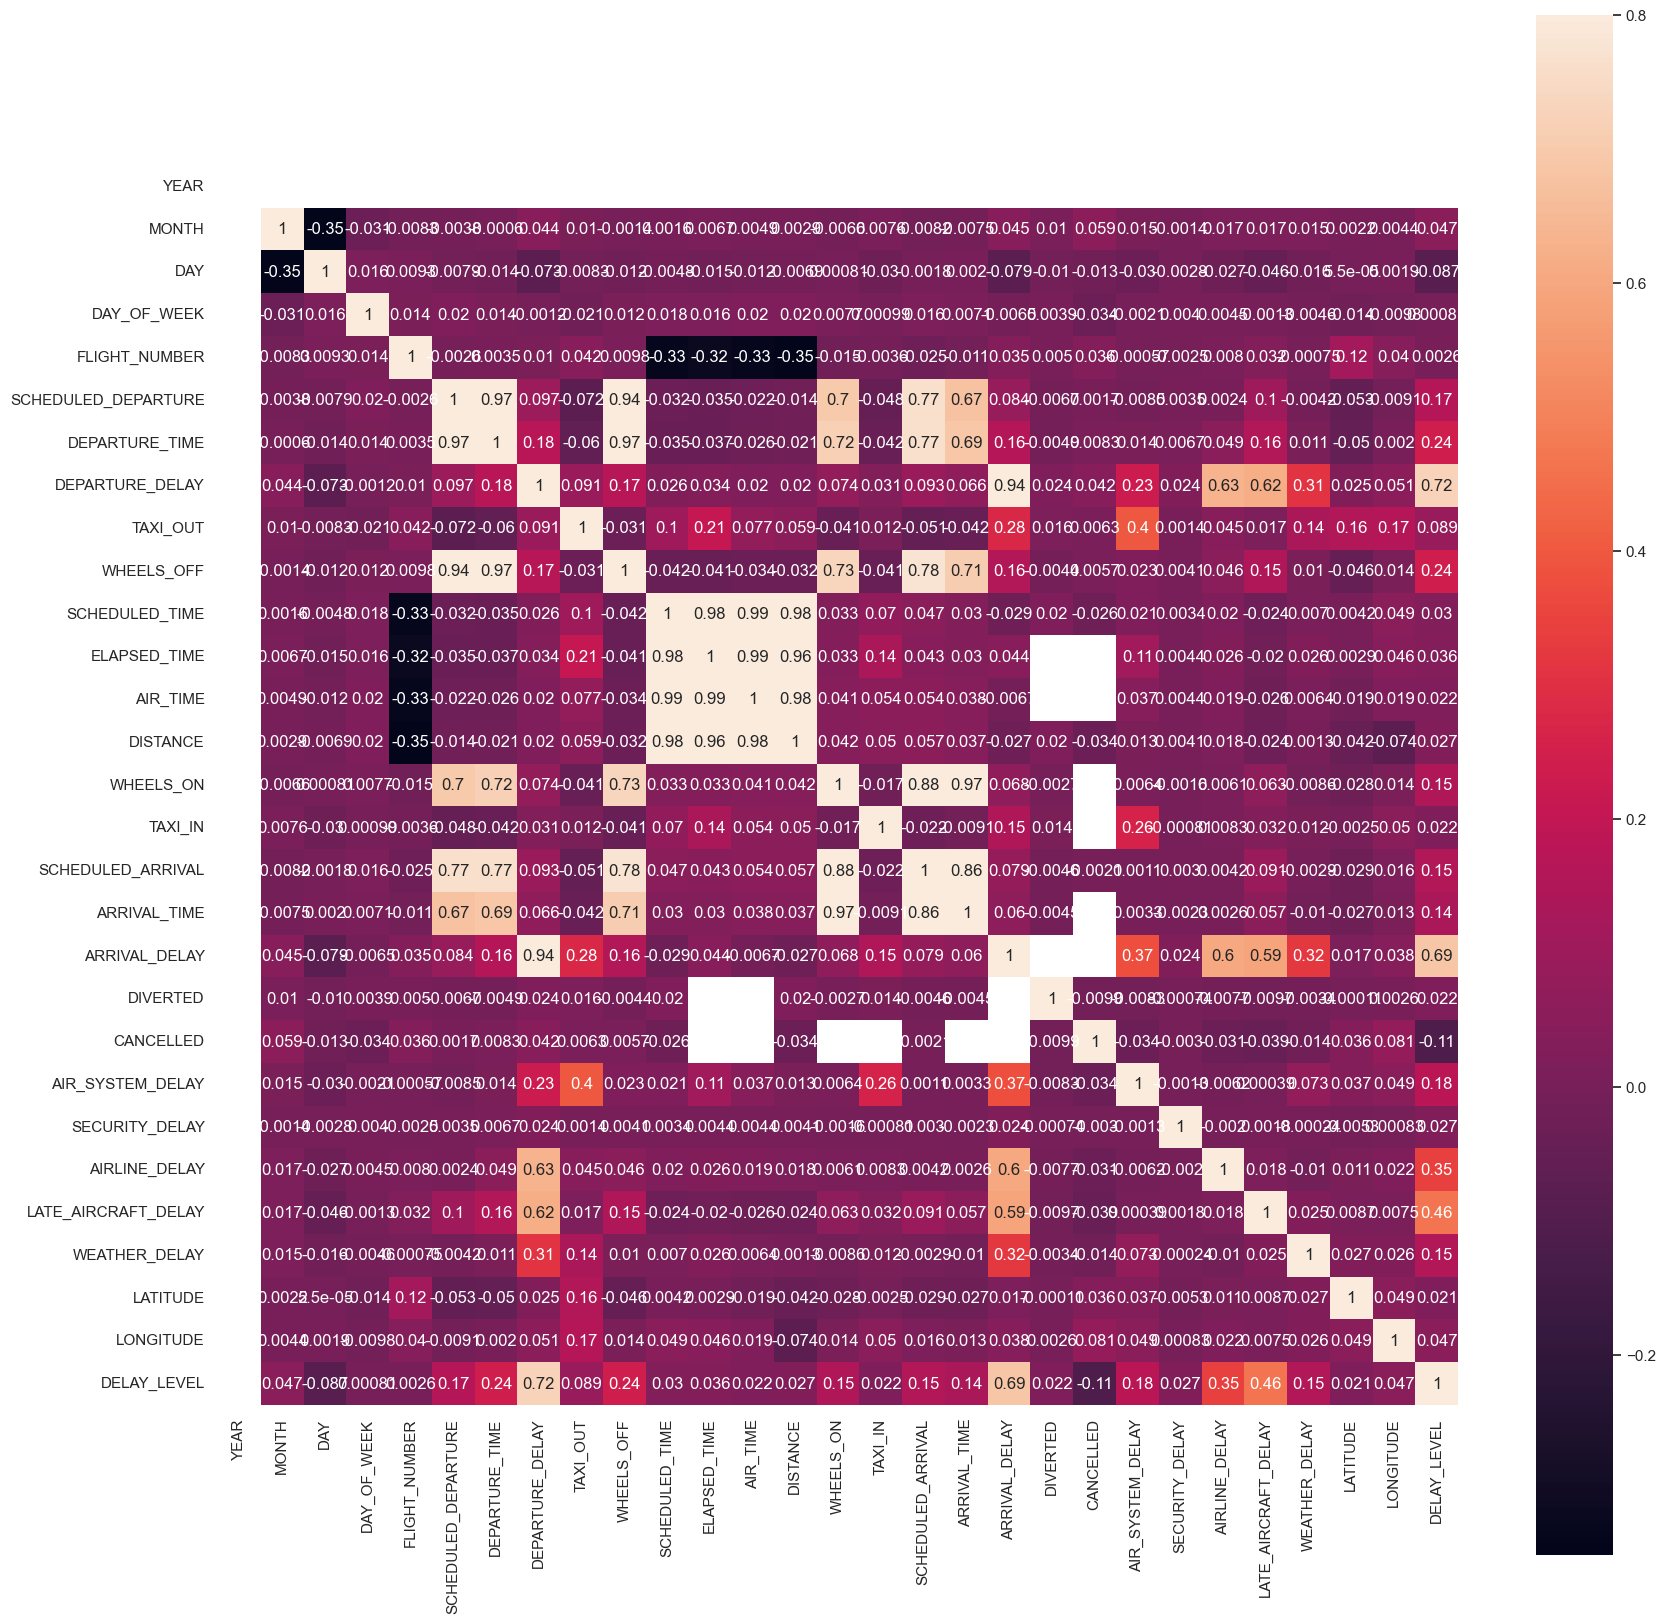

In [66]:
# Correlation check using the heat map
a = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(a, vmax=.8, square=True, annot=True);

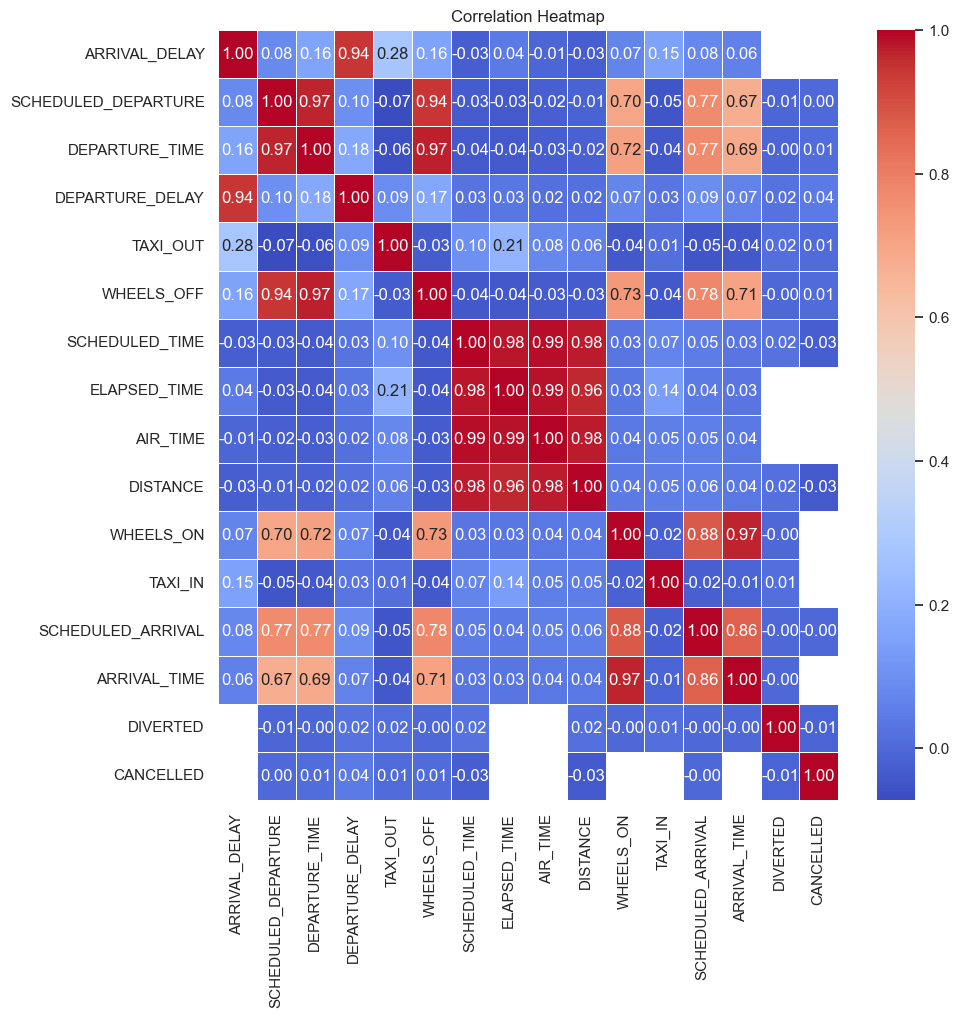

In [67]:
continuous_vars = df[['ARRIVAL_DELAY', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'DIVERTED', 'CANCELLED']]

# Calculate the correlation matrix
corr_matrix = continuous_vars.corr()

# Using Seaborn to create a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

plt.title('Correlation Heatmap')
plt.show()

There is a strong relationship between the following:
    i. Wheels off and Wheels on
    ii.Elapsed time and Scheduled time
    iii. Elapsed time and Distance
    iv. Airtime and Distance
    v. Scheduled Time and Distance
    vi. Airtime and Elapsed Time
    vii. Scheduled Time and Airtime
    viii. Arrival Delay and Departure Delay 
    ix. DelaY Level and Departure delay
    
    

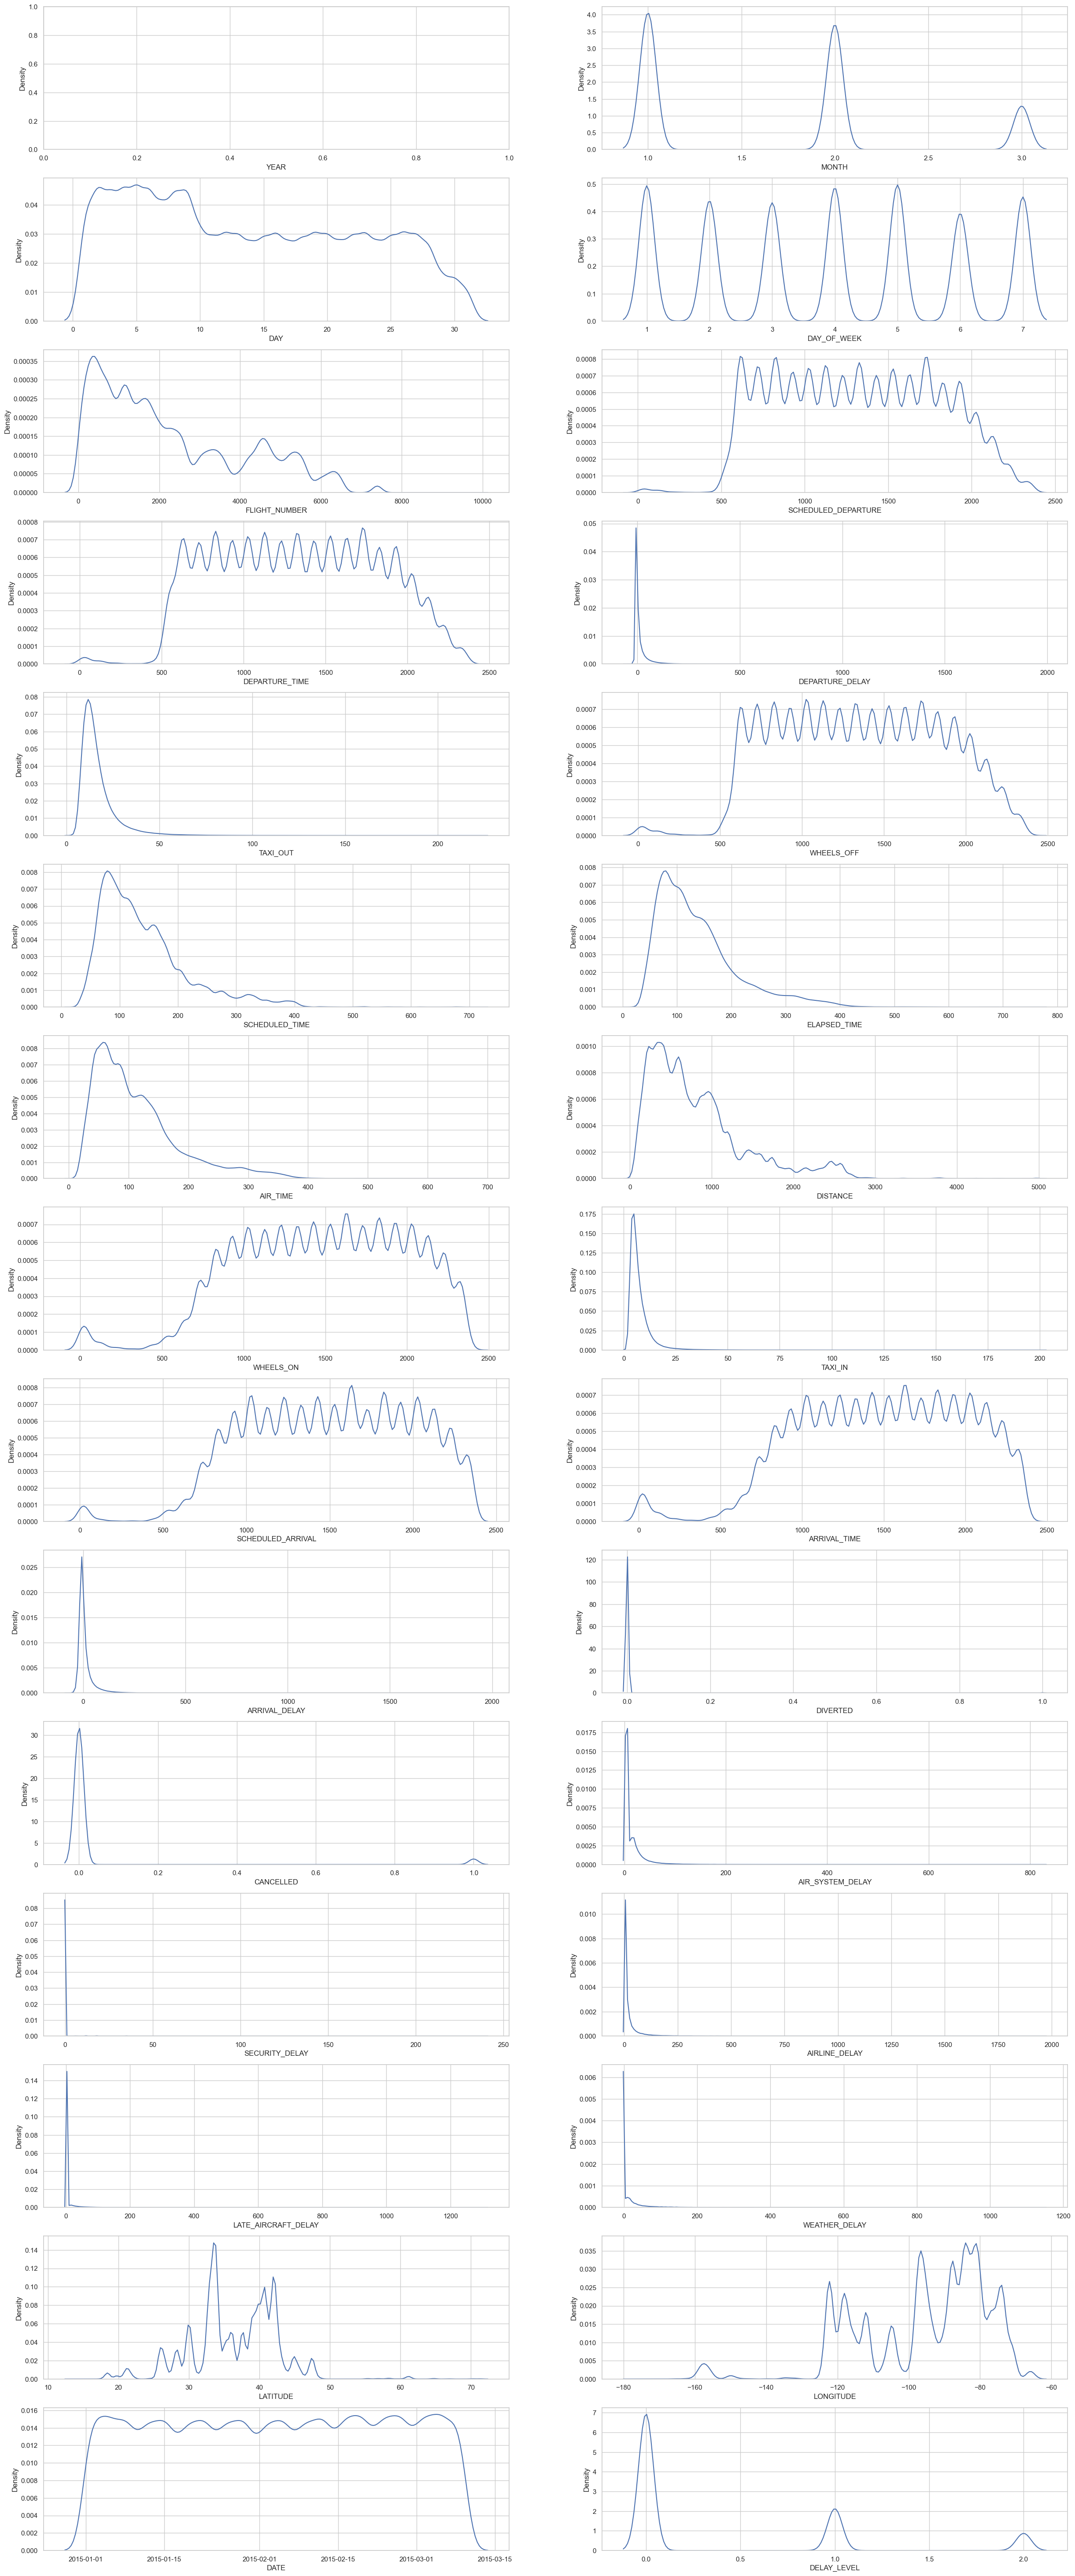

In [68]:
#multivariate analsysis
#density estimation plots of all numerical features
# Calculate the number of numerical columns
num_cols = sum(df[col].dtype != 'object' for col in df.columns)

# Define the grid size based on the number of numerical columns
n_rows = (num_cols + 1) // 2
plt.figure(figsize=(30, 5 * n_rows))

# Generate the subplots
# Generate the subplots
fsubplot_index = 1
for col in df.columns:
    if df[col].dtype != 'object':
        ax = plt.subplot(n_rows, 2, fsubplot_index)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        fsubplot_index += 1

plt.show()



# COMPARING CATEGORICAL VARIABLES 

## - AIRLINE, ORIGIN AIRPORT & DESTINATION AIRPORT

In [69]:
df.describe(include=["object", "bool"])

TAIL_NUMBER ORIGIN_AIRPORT DESTINATION_AIRPORT CANCELLATION_REASON  \
count      1040825        1048575             1048575               40528   
unique        4522            315                 315                   4   
top         N477HA            ATL                 ATL                   B   
freq           809          66599               66741               28261   

                       AIRLINE IATA_CODE  \
count                  1048575   1048575   
unique                      14       315   
top     Southwest Airlines Co.       ATL   
freq                    221586     66599   

                                                 AIRPORT     CITY    STATE  \
count                                            1048575  1048575  1048575   
unique                                               315      301       54   
top     Hartsfield-Jackson Atlanta International Airport  Chicago       TX   
freq                                               66599    67873   129139   

        COUNTRY  
count   1048575  
unique        1  
top         USA  
freq    1048575

## COMPARING AIRLINE, DEPARTURE DELAY, DELAY LEVEL & ARRIVAL DELAY

In [70]:
delay=df.groupby("AIRLINE")[["DEPARTURE_DELAY", "DELAY_LEVEL", "ARRIVAL_DELAY"]].sum().reset_index()
delay.head(3)

AIRLINE  DEPARTURE_DELAY  DELAY_LEVEL  ARRIVAL_DELAY
0          Alaska Airlines Inc.          85426.0         6896       -18002.0
1        American Airlines Inc.        1053058.0        35498       762411.0
2  American Eagle Airlines Inc.        1052787.0        32383      1176744.0

In [71]:
delay = pd.melt(delay, id_vars=["AIRLINE"], var_name="Metric", value_name="Value")
delay.head(3) # Top rows

AIRLINE           Metric      Value
0          Alaska Airlines Inc.  DEPARTURE_DELAY    85426.0
1        American Airlines Inc.  DEPARTURE_DELAY  1053058.0
2  American Eagle Airlines Inc.  DEPARTURE_DELAY  1052787.0

In [72]:
delay.tail(3) # 3 bottom rows

AIRLINE         Metric     Value
39        US Airways Inc.  ARRIVAL_DELAY  389590.0
40  United Air Lines Inc.  ARRIVAL_DELAY  633070.0
41         Virgin America  ARRIVAL_DELAY   52847.0

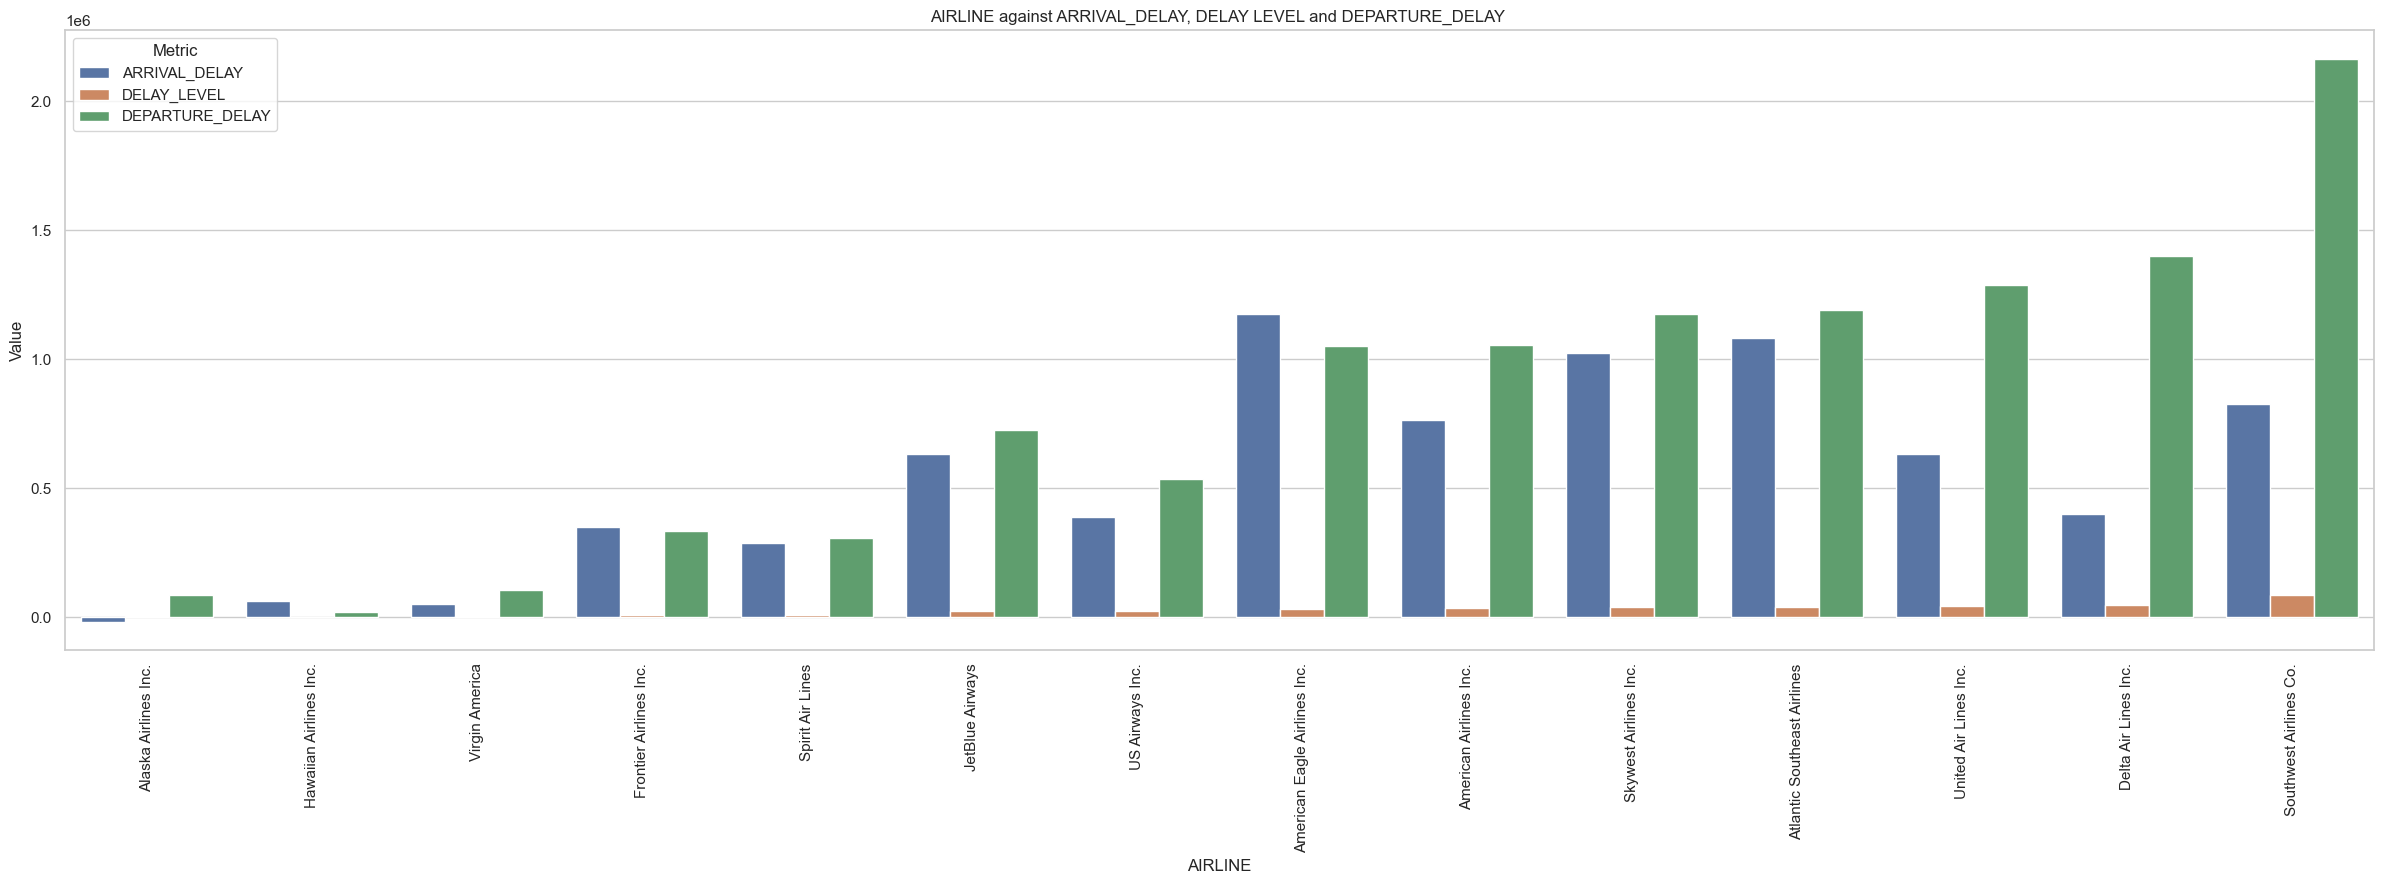

In [73]:
# Sort the DataFrame by the Value column in ascending order
delay.sort_values(by="Value", ascending=True, inplace=True)

plt.figure(figsize=(24,9))
plt.title("AIRLINE against ARRIVAL_DELAY, DELAY LEVEL and DEPARTURE_DELAY ")
sns.barplot(data=delay, x="AIRLINE", y="Value", hue="Metric")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

From the chart above, The delay level increased as the departure delay increased from the airlines. While the Arrival delay varied from different airlines.

In [74]:
delay2=df.groupby("AIRLINE")[["SCHEDULED_TIME","DELAY_LEVEL", "ARRIVAL_DELAY"]].sum().reset_index()
delay2.head(3)

AIRLINE  SCHEDULED_TIME  DELAY_LEVEL  ARRIVAL_DELAY
0          Alaska Airlines Inc.       5382866.0         6896       -18002.0
1        American Airlines Inc.      17032875.0        35498       762411.0
2  American Eagle Airlines Inc.       6222897.0        32383      1176744.0

In [75]:
delay2 = pd.melt(delay2, id_vars=["AIRLINE"], var_name="Metric", value_name="Value")
delay2.head(3) # Top rows

AIRLINE          Metric       Value
0          Alaska Airlines Inc.  SCHEDULED_TIME   5382866.0
1        American Airlines Inc.  SCHEDULED_TIME  17032875.0
2  American Eagle Airlines Inc.  SCHEDULED_TIME   6222897.0

In [76]:
delay2.tail(3)

AIRLINE         Metric     Value
39        US Airways Inc.  ARRIVAL_DELAY  389590.0
40  United Air Lines Inc.  ARRIVAL_DELAY  633070.0
41         Virgin America  ARRIVAL_DELAY   52847.0

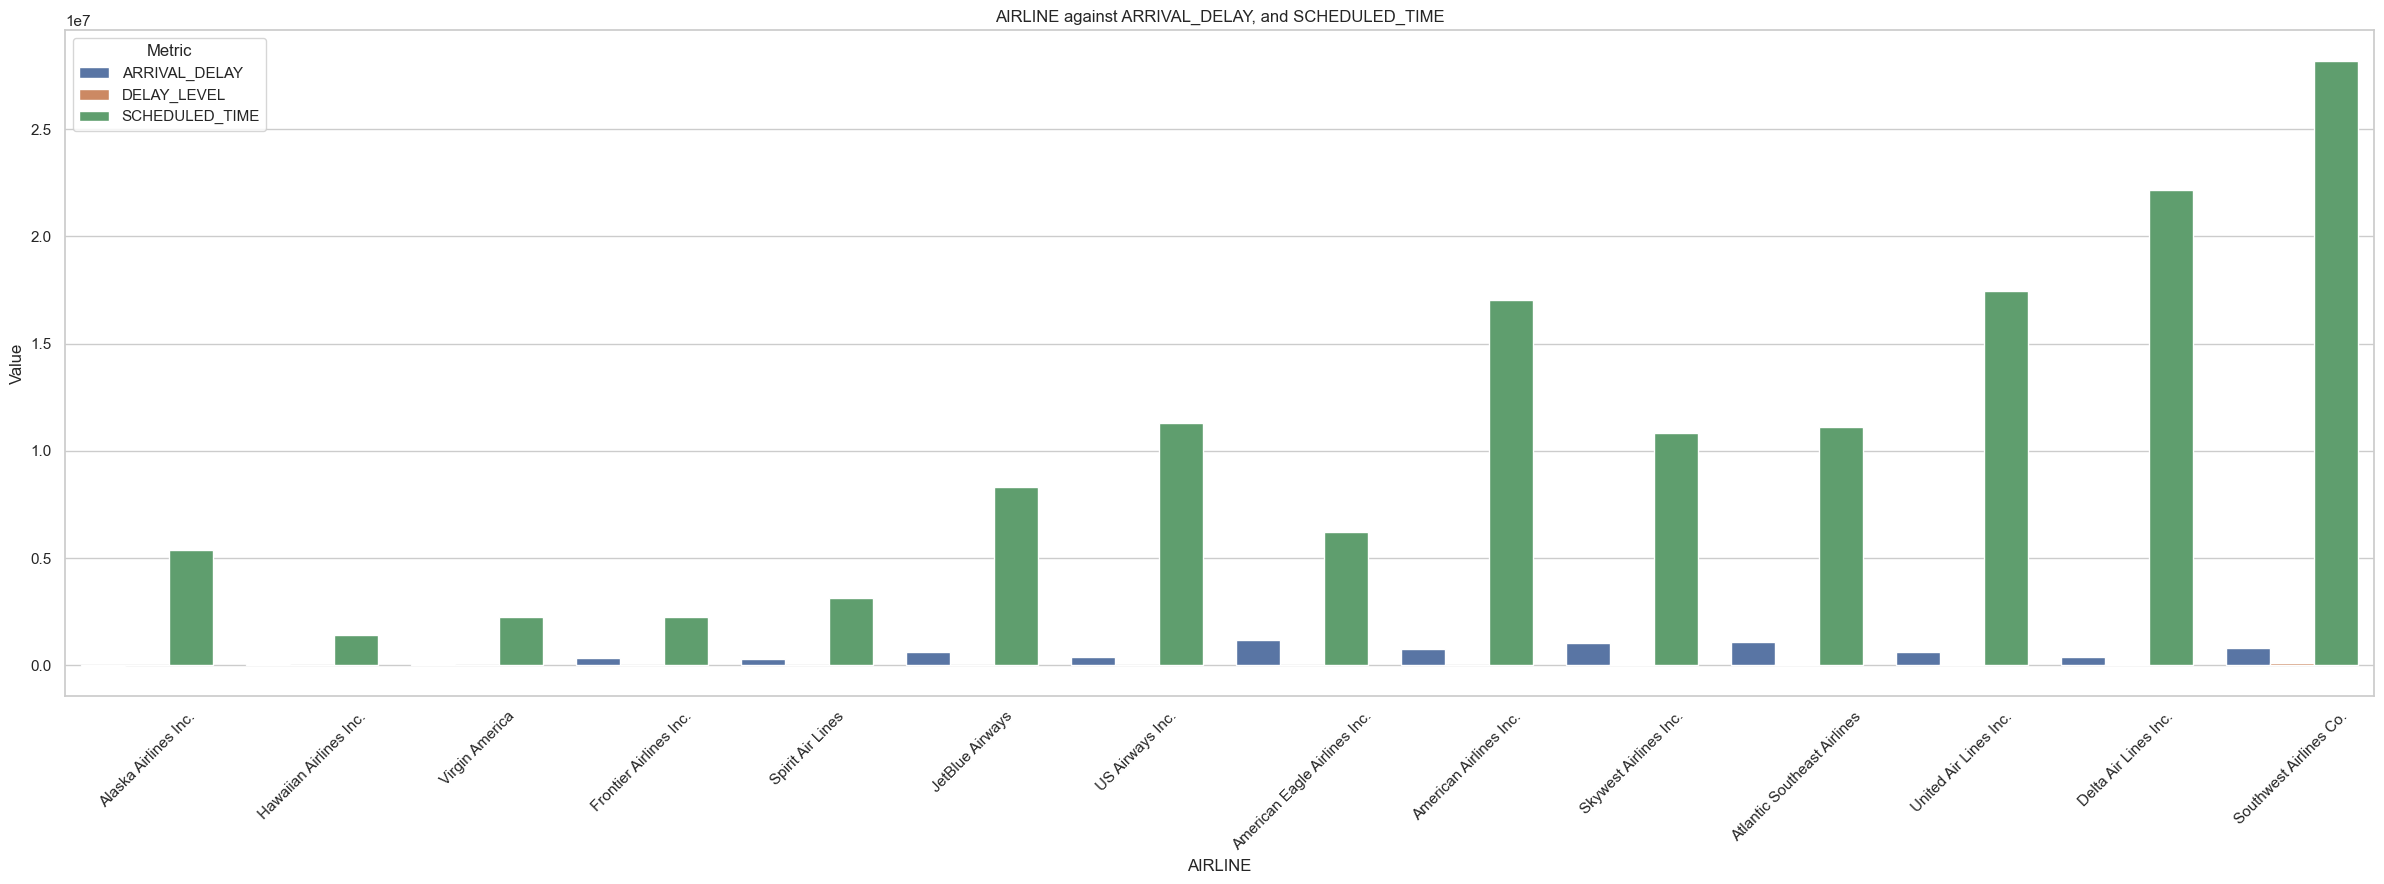

In [77]:
# Convert "Value" column to numeric if it contains a mix of data types
# Sort the DataFrame by the Value column in ascending order
delay2.sort_values(by="Value", ascending=True, inplace=True)
plt.figure(figsize=(24,9))
plt.title("AIRLINE against ARRIVAL_DELAY, and SCHEDULED_TIME")
sns.barplot(data=delay2, x="AIRLINE", y="Value", hue="Metric")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the chart above, The scheduled time differs from different airlines.
While the Arrival delay varied from different airlines.

In [78]:
df[["SCHEDULED_ARRIVAL","ARRIVAL_TIME"]].describe()

SCHEDULED_ARRIVAL  ARRIVAL_TIME
count       1.048575e+06  1.007279e+06
mean        1.504820e+03  1.492204e+03
std         4.865613e+02  5.071090e+02
min         1.000000e+00  1.000000e+00
25%         1.120000e+03  1.115000e+03
50%         1.524000e+03  1.521000e+03
75%         1.915000e+03  1.917000e+03
max         2.359000e+03  2.400000e+03

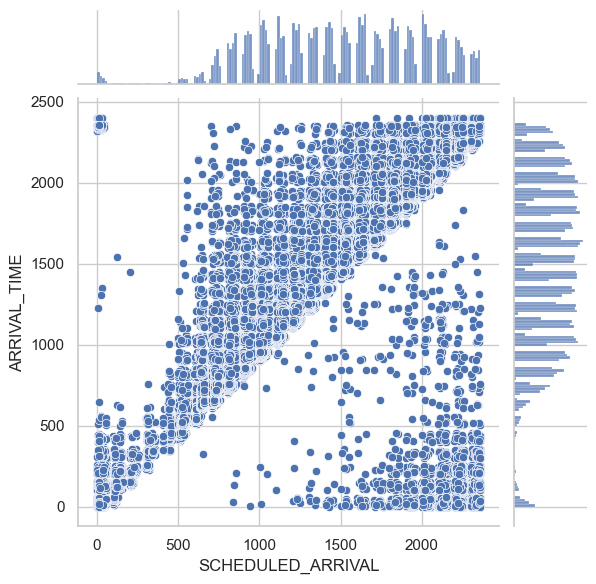

In [79]:
sns.jointplot(data=df, x="SCHEDULED_ARRIVAL", y="ARRIVAL_TIME")

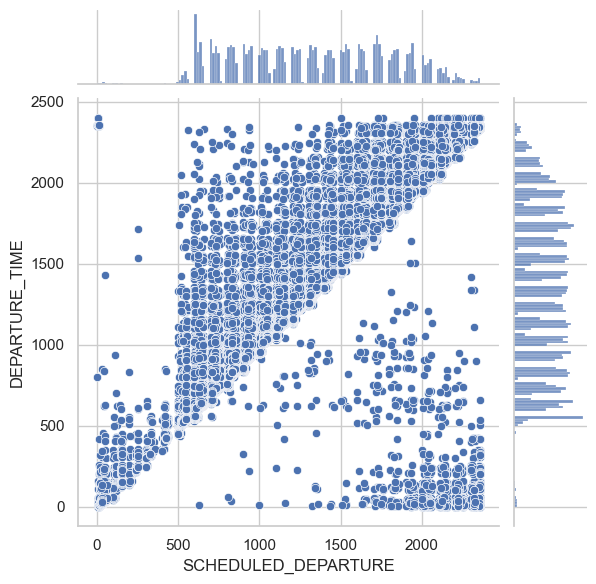

In [80]:
sns.jointplot(data=df, x="SCHEDULED_DEPARTURE", y="DEPARTURE_TIME")

# MACHINE LEARNING

## DATA PREPROCESSING

In [81]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'AIRLINE', 'IATA_CODE', 'AIRPORT', 'CITY', 'STATE',
       'COUNTRY', 'LATITUDE', 'LONGITUDE', 'DATE', 'DELAY_LEVEL'],
      dtype='object')

In [82]:
# filtering out unnecessary columns
data=df.drop(['YEAR','FLIGHT_NUMBER','AIRLINE','DISTANCE','TAIL_NUMBER','TAXI_OUT',
                                              'SCHEDULED_TIME','DEPARTURE_TIME','WHEELS_OFF','ELAPSED_TIME',
                                              'AIR_TIME','WHEELS_ON','DAY_OF_WEEK','TAXI_IN','CANCELLATION_REASON'],
                                             axis=1)

In [83]:
data.head(3)


MONTH  DAY ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  \
0      1    1            ANC                 SEA                    5   
1      1    1            ANC                 SEA                   45   
2      1    1            ANC                 PDX                   50   

   DEPARTURE_DELAY  SCHEDULED_ARRIVAL  ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  \
0            -11.0                430         408.0          -22.0         0   
1             -4.0                509         455.0          -14.0         0   
2             -4.0                525         507.0          -18.0         0   

   ...  WEATHER_DELAY  IATA_CODE                                      AIRPORT  \
0  ...            0.0        ANC  Ted Stevens Anchorage International Airport   
1  ...            0.0        ANC  Ted Stevens Anchorage International Airport   
2  ...            0.0        ANC  Ted Stevens Anchorage International Airport   

        CITY  STATE  COUNTRY  LATITUDE  LONGITUDE       DATE DELAY_LEVEL  
0  Anchorage     AK      USA  61.17432 -149.99619 2015-01-01           0  
1  Anchorage     AK      USA  61.17432 -149.99619 2015-01-01           0  
2  Anchorage     AK      USA  61.17432 -149.99619 2015-01-01           0  

[3 rows x 25 columns]

In [84]:
# FOR ML we work with only integers or float. if there is an object we change it.
# To check the types
data.dtypes #they are all integers only 1 float.

MONTH                           int64
DAY                             int64
ORIGIN_AIRPORT                 object
DESTINATION_AIRPORT            object
SCHEDULED_DEPARTURE             int64
DEPARTURE_DELAY               float64
SCHEDULED_ARRIVAL               int64
ARRIVAL_TIME                  float64
ARRIVAL_DELAY                 float64
DIVERTED                        int64
CANCELLED                       int64
AIR_SYSTEM_DELAY              float64
SECURITY_DELAY                float64
AIRLINE_DELAY                 float64
LATE_AIRCRAFT_DELAY           float64
WEATHER_DELAY                 float64
IATA_CODE                      object
AIRPORT                        object
CITY                           object
STATE                          object
COUNTRY                        object
LATITUDE                      float64
LONGITUDE                     float64
DATE                   datetime64[ns]
DELAY_LEVEL                     int64
dtype: object

In [85]:
# replacing all NaN values with the mean of the attribute in which they are present
data=data.fillna(data.median())

In [86]:
data.head(3)

MONTH  DAY ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  \
0      1    1            ANC                 SEA                    5   
1      1    1            ANC                 SEA                   45   
2      1    1            ANC                 PDX                   50   

   DEPARTURE_DELAY  SCHEDULED_ARRIVAL  ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  \
0            -11.0                430         408.0          -22.0         0   
1             -4.0                509         455.0          -14.0         0   
2             -4.0                525         507.0          -18.0         0   

   ...  WEATHER_DELAY  IATA_CODE                                      AIRPORT  \
0  ...            0.0        ANC  Ted Stevens Anchorage International Airport   
1  ...            0.0        ANC  Ted Stevens Anchorage International Airport   
2  ...            0.0        ANC  Ted Stevens Anchorage International Airport   

        CITY  STATE  COUNTRY  LATITUDE  LONGITUDE       DATE DELAY_LEVEL  
0  Anchorage     AK      USA  61.17432 -149.99619 2015-01-01           0  
1  Anchorage     AK      USA  61.17432 -149.99619 2015-01-01           0  
2  Anchorage     AK      USA  61.17432 -149.99619 2015-01-01           0  

[3 rows x 25 columns]

In [87]:
# creating a new column; it will tell if the flight was delayed or not
result=[]

In [88]:
for row in data['ARRIVAL_DELAY']:
  if row > 15:
    result.append(1)
  else:
    result.append(0) 

In [89]:
data['result'] = result

In [90]:
data.tail(3)

MONTH  DAY ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  \
1048572      3   10            ISP                 TPA                  635   
1048573      3   10            ISP                 PBI                  640   
1048574      3   10            ISP                 MCO                  705   

         DEPARTURE_DELAY  SCHEDULED_ARRIVAL  ARRIVAL_TIME  ARRIVAL_DELAY  \
1048572             -3.0                935         935.0            0.0   
1048573              0.0                935         942.0            7.0   
1048574             -1.0               1005         956.0           -9.0   

         DIVERTED  ...  IATA_CODE                        AIRPORT   CITY  \
1048572         0  ...        ISP  Long Island MacArthur Airport  Islip   
1048573         0  ...        ISP  Long Island MacArthur Airport  Islip   
1048574         0  ...        ISP  Long Island MacArthur Airport  Islip   

         STATE  COUNTRY  LATITUDE LONGITUDE       DATE DELAY_LEVEL result  
1048572     NY      USA  40.79524 -73.10021 2015-03-10           0      0  
1048573     NY      USA  40.79524 -73.10021 2015-03-10           0      0  
1048574     NY      USA  40.79524 -73.10021 2015-03-10           0      0  

[3 rows x 26 columns]

In [91]:
data.value_counts('result')

result
0    828158
1    220417
dtype: int64

In [95]:
data.value_counts('DELAY_LEVEL')

DELAY_LEVEL
0    732808
1    224071
2     91696
dtype: int64

In [96]:
data.value_counts('DIVERTED')

DIVERTED
0    1046031
1       2544
dtype: int64

In [92]:
# removing some more columns

data=data.drop(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_TIME', 'ARRIVAL_DELAY','AIRPORT'],axis=1)
data.head(3)

MONTH  DAY  SCHEDULED_DEPARTURE  DEPARTURE_DELAY  SCHEDULED_ARRIVAL  \
0      1    1                    5            -11.0                430   
1      1    1                   45             -4.0                509   
2      1    1                   50             -4.0                525   

   DIVERTED  CANCELLED  AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  ...  \
0         0          0               4.0             0.0            2.0  ...   
1         0          0               4.0             0.0            2.0  ...   
2         0          0               4.0             0.0            2.0  ...   

   WEATHER_DELAY  IATA_CODE       CITY STATE COUNTRY  LATITUDE  LONGITUDE  \
0            0.0        ANC  Anchorage    AK     USA  61.17432 -149.99619   
1            0.0        ANC  Anchorage    AK     USA  61.17432 -149.99619   
2            0.0        ANC  Anchorage    AK     USA  61.17432 -149.99619   

        DATE DELAY_LEVEL  result  
0 2015-01-01           0       0  
1 2015-01-01           0       0  
2 2015-01-01           0       0  

[3 rows x 21 columns]

## Spliting Data for Training and Testing

In [94]:
## Splitting Data for Training and Testing

import sklearn.model_selection

# Extracting features (X) and labels (y)
X, y = data.iloc[:, :-1], data['result']  

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.20, random_state=42)

In [98]:

import sklearn.model_selection
from sklearn.preprocessing import StandardScaler
 # Splitting Data for Training and Testing
X, y = data.iloc[:, :-1], data.iloc[:, -1]  # Correcting the indexing for selecting columns
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.20, random_state=42)

# Scaling features
scaler = StandardScaler()

# Issue: The data contains non-numeric values, causing a ValueError during scaling.
# Explanation: The 'X_train' and 'X_test' dataframes still contain non-numeric values.
# Solution: Ensure that only numeric features are included in 'X_train' and 'X_test' before scaling.

# Identify non-numeric columns
non_numeric_columns = X.select_dtypes(exclude=['float64', 'int64']).columns

# Drop non-numeric columns from 'X_train' and 'X_test'
X_train_numeric = X_train.drop(columns=non_numeric_columns)
X_test_numeric = X_test.drop(columns=non_numeric_columns)

# Scale the numeric features
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

In [100]:
scaled_features = StandardScaler().fit_transform(X_train_numeric, X_test_numeric)

## Applying Decision Tree Classifier on Training Data

In [103]:
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train_numeric, y_train)

## Making Predictions and Checking Accuracy

In [106]:
from sklearn.metrics import roc_auc_score  # Import roc_auc_score
pred_prob = clf.predict_proba(X_test_numeric)
auc_score = roc_auc_score(y_test, pred_prob[:,1])
auc_score

0.9991249752502912

## Predictions are 99.9% accurate.
